# Lab 2

## Group 4 :  Kristi Herman, Rudranil Mitra, Simerpreet Reddy, Samuel VonPaays Soh

Notebook -> https://github.com/RudranilMitra/DS7331_Lab1/DS_7331_Lab2_Herman_Mitra_Reddy_VonPaaysSoh.ipynb

# Table of Contents
* <a href='#prep1'>Data Preparation Part 1</a>
* <a href='#prep2'>Data Preparation Part 2</a>
* <a href='#model1'>Modeling and Evaluation 1</a>
* <a href='#model2'>Modeling and Evaluation 2</a>
* <a href='#model3'>Modeling and Evaluation 3</a>
* <a href='#model4'>Modeling and Evaluation 4</a>
* <a href='#model5'>Modeling and Evaluation 5</a>
* <a href='#model6'>Modeling and Evaluation 6</a>
* <a href='#deployment'>Deployment</a>
* <a href='#exceptional'>Exceptional Work</a>

---
<a id='prep1'></a>
## <font color='darkgreen'> Data Preparation Part 1 </font>

<i>Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.</i>

The goal of this project is to build at least 3 classification and 3 regression models.

<b>Classification:</b> We will build classfication models to predict a categorical variable 'price_range' of a used car posted on craigslist. The class 'price_range' can have the following values: '<5K','5K-9K','9K-15K','15K-24K','>24K'. These values will be coded into corresponding integer values of 0 through 4 for running the models.

<b>Regression:</b> We will build regression models to predict the price of a used car that has been posted on craigslist. Price is a variable of type int64.

### Data Set

We're using the same data set used for Lab 1 and the Mini-Lab. A summary of 'Data cleaning' and 'New Features' is provided below. Additional details and the corresponding code can be found in the Lab 1 and Mini-Lab assignments:<br>
https://nbviewer.jupyter.org/github/RudranilMitra/DS7331_Lab1/blob/main/ML%20-%20Group%20Project%201.ipynb
https://nbviewer.jupyter.org/github/RudranilMitra/DS7331_Lab1/blob/main/DS_7331_Mini_Lab_Mitra_Reddy_VonPaaysSoh_Herman.ipynb

#### Source data for Lab 1
The source selected for this project is a Craigslist used car listings dataset from Kaggle:  https://www.kaggle.com/austinreese/craigslist-carstrucks-data<br>  The author of this dataset used web scraping algorithms to scrape used vehicle listings from all regional Craigslist sites in the U.S posted between 10/28/2020 and 12/3/2020.  The original dataset contained 458,213 rows with 26 fields.

#### Data cleaning for Lab 1
As part of Lab 1, the following steps were performed:<br>
<ol><li>Retrieved missing values from the U.S. Department Of Transportation VIN API: https://vpic.nhtsa.dot.gov/api/.  A scraper was built to call a ReST endpoint and write the details to a file, which was later joined to the original dataset.</li>
<li>Removed outliers.  Price, year, and odometer had some major outliers. A lot of the extreme outliers seemed to be mistakes (e.g., 3.5 billion for price, 1900 for year). A quantile method was used to remove outliers with an upper limit of 0.99 and lower limit of 0.01. </li>
<li>Removed features that were not useful for model building or had too many missing values that could not be derived or retrieved from the VIN API, or were redundant for our analysis (e.g., region, lat, long were dropped in favor of state).  The following features were removed:
'id', 'Unnamed: 0', 'url', 'image_url','region_url', 'description', 'size', 'region', 'lat', 'long'.</li></ol>
  
#### New features created in Lab 1
As part of Lab 1, the following features were created:<br>
<ol><li>Price_range: The price column was split into multiple price ranges and a categorical column was created. We have regrouped these values for project 2 into more balanced classes below. Price_range is grouped into the following values: 'Less than 5K','5K-9K','9K-15K','15K-24K','>24K'. These values are then coded into corresponding integer values of 0 through 4. </li>
<li>car_Age_in_yrs: A new field for age of the car was derived by subtracting the year of the car from the posting date.</li>
<li>Recategorized the following columns by combining some of the similar values into one group.<p>
         i) Drive_new was derived from Drive<br> 
         ii) Condition_new from Condition<br> 
         iii) transmission_new from transmission<br> 
         iv) type_new from type<br> 
         v) paint_color_new from paint_color<p> 
    The original fields were then dropped.</li></ol>
    
#### Source data for Lab 2
We saved the final data set from Lab 1 into a csv and will be using that csv as the source for this Lab. This data set has <b>137,526 rows</b> and <b>16 columns</b>.
    

<blockquote><i>Define and prepare your class variables.</i></blockquote>

In [52]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as mt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import residuals_plot
from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import CooksDistance
from sklearn.model_selection import train_test_split

%matplotlib inline

In [53]:
car_df1=pd.read_csv("data/out.csv")

car_df1=car_df1[['price_range','price', 'manufacturer', 'model', 'cylinders', 'fuel', 'odometer',
       'title_status', 'state', 'posting_date', 'drive_new',
       'condition_new', 'transmission_new', 'type_new', 'paint_color_new',
       'car_Age_in_yrs']]

In [54]:
car_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price_range       137526 non-null  object 
 1   price             137526 non-null  int64  
 2   manufacturer      137526 non-null  object 
 3   model             137526 non-null  object 
 4   cylinders         137526 non-null  int64  
 5   fuel              137526 non-null  object 
 6   odometer          137526 non-null  float64
 7   title_status      137526 non-null  object 
 8   state             137526 non-null  object 
 9   posting_date      137526 non-null  object 
 10  drive_new         137526 non-null  object 
 11  condition_new     137526 non-null  object 
 12  transmission_new  137526 non-null  object 
 13  type_new          137526 non-null  object 
 14  paint_color_new   137526 non-null  object 
 15  car_Age_in_yrs    137526 non-null  float64
dtypes: float64(2), int64

#### Recategorize the column 'price_range' into more balanced classes for the classification task

In [55]:
car_df1['price_range'] = pd.cut(x=car_df1['price'], bins=[-1, 5000,9000,15000,24000,100000],
                               labels=['<5K','5K-9K','9K-15K','15K-24K','>24K'])
car_df1['price_range'].unique()

['15K-24K', '>24K', '<5K', '5K-9K', '9K-15K']
Categories (5, object): ['<5K' < '5K-9K' < '9K-15K' < '15K-24K' < '>24K']

In [56]:
car_df1['price_range']=np.where(car_df1['price_range']=='<5K','veryLow',car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='5K-9K','low',car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='9K-15K','medium',car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='15K-24K','high',car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='>24K','veryHigh',car_df1['price_range'])

In [57]:
car_df1['price_range']=np.where(car_df1['price_range']=='veryLow',0,car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='low',1,car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='medium',2,car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='high',3,car_df1['price_range'])
car_df1['price_range']=np.where(car_df1['price_range']=='veryHigh',4,car_df1['price_range'])

In [58]:
car_df1['price_range']=[int(i) for i in car_df1['price_range']]

In [59]:
car_df1['price_range'].value_counts(sort=False)

0    27942
1    28847
2    29192
3    25248
4    26297
Name: price_range, dtype: int64

In [1]:
%%html
<style>
table {float:left}
</style>

Text(0, 0.5, 'Number of instances')

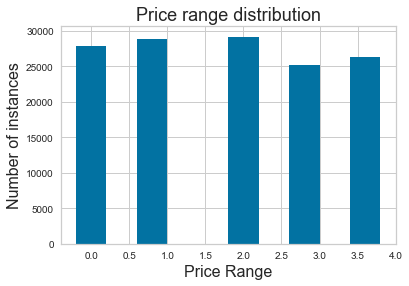

In [61]:
plt.hist(align='left', x=car_df1.price_range.values)
plt.title("Price range distribution", fontsize=18)
plt.xlabel('Price Range', fontsize=16)
plt.ylabel('Number of instances', fontsize=16)

We can see from the plot above that the data set is more balanced now in terms of the class variable 'price_range'. The number of rows present in the data set for each price_range category is now much closer.<br>    


|<p>price_range|<p>Description|<p>Number of rows|
|:-----|:-----|:-----|
|<p>0 |<p>veryLow|27942 |
|<p>1 |<p>low|28847 |
|<p>2 |<p>medium|29192 |
|<p>3 |<p>high|25248 |
|<p>4 |<p>veryHigh|26297 |

#### We will build Regresion models for the price

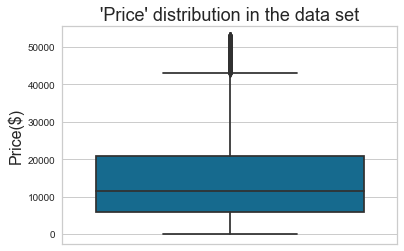

In [62]:
# boxplots after removing the outliers
sns.boxplot(y=car_df1['price'])
plt.title("'Price' distribution in the data set", fontsize=18)
plt.ylabel('Price($)', fontsize=16)
plt.show()

The box plot above shows the distribution of the column 'price' across the data set. We see the following stats from the plot: <li> Lower quartile is around 6K </li> <li> Median is around 11K  </li> <li> Upper quartile is around 21K </li> <li> Max Price appears to be around 52K </li> <li> Minimum Price looks to be a little above 0 </li>

In [63]:
car_df1['price'].describe()

count    137526.000000
mean      14502.325611
std       10689.592637
min           1.000000
25%        5995.000000
50%       11590.000000
75%       20800.000000
max       52913.000000
Name: price, dtype: float64

<blockquote><i>Remove variables that are not needed/useful for the analysis.</i></blockquote>
<b> posting date</b>: We are removing 'posting date' column because we derived the column 'car_Age_in_yrs' using this column and thus it is now redundant.<br>
<b> model</b>: This column has around 40k unique values and we will be one hot encoding the data. We have other columns such as manufacturer, drive, transmission, type, cylinders, fuel etc. that can provide as much information that could be derived from this column. Thus we will not be using this column for classification or regression purposes.<br>
<b> price</b>: For classification models to predict 'price_range', column 'price' will be dropped from the data set as 'price_range' was originally derived from the column 'price'. This column will be dropped from the final data set for classification before running the models.<br>
<b> price_range </b>: For regression models to predict 'price', the column 'price_range' will be dropped from the data as it is a direct indicator of price. This column will be dropped from the final data set for regression before running the models.

In [64]:
car_df1= car_df1.drop(['posting_date','model'],axis=1)

<blockquote><i>Use proper variable representations (int, float, one-hot, etc.).</i> </blockquote>

### One Hot Encoding

Data Structure before one hot encoding

In [65]:
car_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price_range       137526 non-null  int64  
 1   price             137526 non-null  int64  
 2   manufacturer      137526 non-null  object 
 3   cylinders         137526 non-null  int64  
 4   fuel              137526 non-null  object 
 5   odometer          137526 non-null  float64
 6   title_status      137526 non-null  object 
 7   state             137526 non-null  object 
 8   drive_new         137526 non-null  object 
 9   condition_new     137526 non-null  object 
 10  transmission_new  137526 non-null  object 
 11  type_new          137526 non-null  object 
 12  paint_color_new   137526 non-null  object 
 13  car_Age_in_yrs    137526 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 14.7+ MB


In [66]:
#One hot encoding using pd.get_dummies
car_df1_ohe=pd.get_dummies(car_df1[['price_range','price', 'manufacturer', 'cylinders', 'fuel', 'odometer',
       'title_status', 'state', 'drive_new', 'condition_new',
       'transmission_new', 'type_new', 'paint_color_new', 'car_Age_in_yrs']],drop_first=True)

Data structure after one hot encoding

In [67]:
car_df1_ohe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Data columns (total 123 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    price_range                   int64  
 1    price                         int64  
 2    cylinders                     int64  
 3    odometer                      float64
 4    car_Age_in_yrs                float64
 5    manufacturer_alfa-romeo       uint8  
 6    manufacturer_aston-martin     uint8  
 7    manufacturer_audi             uint8  
 8    manufacturer_bmw              uint8  
 9    manufacturer_buick            uint8  
 10   manufacturer_cadillac         uint8  
 11   manufacturer_chevrolet        uint8  
 12   manufacturer_chrysler         uint8  
 13   manufacturer_datsun           uint8  
 14   manufacturer_dodge            uint8  
 15   manufacturer_ferrari          uint8  
 16   manufacturer_fiat             uint8  
 17   manufacturer_ford             uint8  
 18   ma

In [68]:
car_df1_ohe.describe()

,price_range,price,cylinders,odometer,car_Age_in_yrs,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_new_crossover,type_new_hatchback,type_new_mini-van,type_new_offroad,type_new_pickup_truck,type_new_sedan,type_new_van,paint_color_new_BluRdBrwn,paint_color_new_Custom,paint_color_new_OrYlwGrnPrpl
count,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,...,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000
mean,1.949908,14502.325611,5.802990,99723.645413,9.111332,0.000320,0.000065,0.009649,0.030627,0.012550,...,0.255275,0.059916,0.025370,0.002610,0.239424,0.296046,0.031172,0.244056,0.019771,0.036909
std,1.403001,10689.592637,1.610902,59323.251771,6.032133,0.017884,0.008089,0.097755,0.172305,0.111324,...,0.436017,0.237332,0.157246,0.051026,0.426733,0.456513,0.173784,0.429527,0.139212,0.188540
min,0.000000,1.000000,2.000000,181.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5995.000000,4.000000,50000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,11590.000000,6.000000,97127.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,20800.000000,8.000000,141444.750000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,52913.000000,12.000000,269781.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<blockquote><i>Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. </i></blockquote>

### Scaling the data set
We are using the StandardScaler from sklearn.preprocessing to scale the data set.

In [69]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

#### For classification models, remove the column 'price' from the data set

In [70]:
car_df1_ohe_class = car_df1_ohe.drop(['price'],axis=1)

#### Scaling the classification data set

In [71]:
y_class = car_df1_ohe_class['price_range'].values # get the labels we want
del car_df1_ohe_class['price_range'] # get rid of the class label
X_class = car_df1_ohe_class.values # use everything else to predict!

X_class = scl.fit_transform(X_class)

X for classification is a data set with 121 features and 137,526 instances.

In [72]:
X_class.shape

(137526, 121)

y has 137,526 instances of the class variable price range with unique values 0 through 4.

In [73]:
y_class.shape

(137526,)

In [74]:
np.unique(y_class)

array([0, 1, 2, 3, 4], dtype=int64)

#### For regression models, remove the column 'price_range' from the data set

In [75]:
car_df1_ohe_reg = car_df1_ohe.drop(['price_range'],axis=1)

#### Scaling the regression data set

In [76]:
y_reg = car_df1_ohe_reg['price'].values # get the labels we want
del car_df1_ohe_reg['price'] # get rid of the class label
X_reg = car_df1_ohe_reg.values # use everything else to predict!

X_reg = scl.fit_transform(X_reg)

X for regression is a scaled data set with 121 features and 137,526 instances.

In [77]:
X_reg.shape

(137526, 121)

y has 137,526 instances of the continuous price variable.

In [78]:
y_reg.shape

(137526,)

X_reg and y_reg will be used to fit the cross-validated regression models.  For the purposes of plotting and t-tests, a separate training and test will be used.  

In [277]:
# Create a train and test dataset for Residual and Error plots
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

A randomly sampled data set of 30,000 instances will be used for Random Forest Regression GridSearch in order to complete processing in a reasonable time.

In [80]:
#sample 30,000 records for Random Forest to reduce processing time
car_df_30k = car_df1_ohe.sample(n=30000, random_state=42)

In [81]:
car_df_30k = car_df_30k.drop(['price_range'],axis=1)

In [82]:
#create X, y for sampled data
y_30k = car_df_30k['price'].values
del car_df_30k['price'] 
X_30k = car_df_30k.values

In [83]:
#scale the sampled data
scl.fit(X_30k) # find scalings for each column that make this zero mean and unit std
X_scaled_30k = scl.transform(X_30k)

X for  is a data set with 121 features and 30,000 instances.

In [84]:
X_scaled_30k.shape

(30000, 121)

y has 30,000 sampled instances of the continuous price variable.

In [85]:
y_30k.shape

(30000,)

In [86]:
# Create a train and test dataset for Residual and Error plots - 30k
X_train_30k, X_test_30k, y_train_30k, y_test_30k = train_test_split(X_scaled_30k, y_30k, test_size=0.2, random_state=42)

Dimension reduction will not be performed on this data set. Most of the variables in this data set are categorical and the analysis from the Mini-Lab showed that PCA did not provide any improvement on the models even after one hot encoding. 

<a id='prep2'></a>
## <font color='darkgreen'> Data Preparation Part 2 </font>

<i>Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).</i>

<b> Final dataset description </b><br>
The final dataset for the classification/regression problems is a one hot encoded and scaled version of the original data set.

<u>Number of rows</u>: 137,526.<br>
<u>Number of features</u>: 121. The original 13 features for the used cars posted on Craigslist have been 'one hot encoded' and the resulting data set has 121 features.<br>
<u>Response variable for classification</u>: price_range (int).<br>
<u>Response variable for regression</u>: price (int).

<b>Newly formed variables</b><br>
<u>car_Age_in_yrs:</u> The age of the vehicle in years.  This column was created as part of Lab 1. It is calculated by subtracting 'year_built' from 'posting_date'.<br>
<u>One hot encoded columns:</u> One separate column is created for all the different categories for each categorical column using the get_dummies function for one hot encoding.

In [87]:
car_df1_ohe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Data columns (total 123 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    price_range                   int64  
 1    price                         int64  
 2    cylinders                     int64  
 3    odometer                      float64
 4    car_Age_in_yrs                float64
 5    manufacturer_alfa-romeo       uint8  
 6    manufacturer_aston-martin     uint8  
 7    manufacturer_audi             uint8  
 8    manufacturer_bmw              uint8  
 9    manufacturer_buick            uint8  
 10   manufacturer_cadillac         uint8  
 11   manufacturer_chevrolet        uint8  
 12   manufacturer_chrysler         uint8  
 13   manufacturer_datsun           uint8  
 14   manufacturer_dodge            uint8  
 15   manufacturer_ferrari          uint8  
 16   manufacturer_fiat             uint8  
 17   manufacturer_ford             uint8  
 18   ma

In [88]:
car_df1_ohe.describe()

,price_range,price,cylinders,odometer,car_Age_in_yrs,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,type_new_crossover,type_new_hatchback,type_new_mini-van,type_new_offroad,type_new_pickup_truck,type_new_sedan,type_new_van,paint_color_new_BluRdBrwn,paint_color_new_Custom,paint_color_new_OrYlwGrnPrpl
count,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,...,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000
mean,1.949908,14502.325611,5.802990,99723.645413,9.111332,0.000320,0.000065,0.009649,0.030627,0.012550,...,0.255275,0.059916,0.025370,0.002610,0.239424,0.296046,0.031172,0.244056,0.019771,0.036909
std,1.403001,10689.592637,1.610902,59323.251771,6.032133,0.017884,0.008089,0.097755,0.172305,0.111324,...,0.436017,0.237332,0.157246,0.051026,0.426733,0.456513,0.173784,0.429527,0.139212,0.188540
min,0.000000,1.000000,2.000000,181.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5995.000000,4.000000,50000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,11590.000000,6.000000,97127.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,20800.000000,8.000000,141444.750000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,52913.000000,12.000000,269781.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### For classification: The class to be predicted is 'price_range'

In [89]:
car_df1_ohe_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Columns: 121 entries, cylinders to paint_color_new_OrYlwGrnPrpl
dtypes: float64(2), int64(1), uint8(118)
memory usage: 18.6 MB


In [90]:
car_df1_ohe_class.columns

Index(['cylinders', 'odometer', 'car_Age_in_yrs', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       ...
       'type_new_crossover', 'type_new_hatchback', 'type_new_mini-van',
       'type_new_offroad', 'type_new_pickup_truck', 'type_new_sedan',
       'type_new_van', 'paint_color_new_BluRdBrwn', 'paint_color_new_Custom',
       'paint_color_new_OrYlwGrnPrpl'],
      dtype='object', length=121)

In [91]:
car_df1_ohe_class.describe()

,cylinders,odometer,car_Age_in_yrs,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,type_new_crossover,type_new_hatchback,type_new_mini-van,type_new_offroad,type_new_pickup_truck,type_new_sedan,type_new_van,paint_color_new_BluRdBrwn,paint_color_new_Custom,paint_color_new_OrYlwGrnPrpl
count,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,...,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000
mean,5.802990,99723.645413,9.111332,0.000320,0.000065,0.009649,0.030627,0.012550,0.015575,0.147419,...,0.255275,0.059916,0.025370,0.002610,0.239424,0.296046,0.031172,0.244056,0.019771,0.036909
std,1.610902,59323.251771,6.032133,0.017884,0.008089,0.097755,0.172305,0.111324,0.123826,0.354525,...,0.436017,0.237332,0.157246,0.051026,0.426733,0.456513,0.173784,0.429527,0.139212,0.188540
min,2.000000,181.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,50000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,97127.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,141444.750000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,269781.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### For regression: The value to be predicted is 'Price'

In [92]:
car_df1_ohe_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137526 entries, 0 to 137525
Columns: 121 entries, cylinders to paint_color_new_OrYlwGrnPrpl
dtypes: float64(2), int64(1), uint8(118)
memory usage: 18.6 MB


In [93]:
car_df1_ohe_reg.columns

Index(['cylinders', 'odometer', 'car_Age_in_yrs', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       ...
       'type_new_crossover', 'type_new_hatchback', 'type_new_mini-van',
       'type_new_offroad', 'type_new_pickup_truck', 'type_new_sedan',
       'type_new_van', 'paint_color_new_BluRdBrwn', 'paint_color_new_Custom',
       'paint_color_new_OrYlwGrnPrpl'],
      dtype='object', length=121)

In [94]:
car_df1_ohe_reg.describe()

,cylinders,odometer,car_Age_in_yrs,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,type_new_crossover,type_new_hatchback,type_new_mini-van,type_new_offroad,type_new_pickup_truck,type_new_sedan,type_new_van,paint_color_new_BluRdBrwn,paint_color_new_Custom,paint_color_new_OrYlwGrnPrpl
count,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,...,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000,137526.000000
mean,5.802990,99723.645413,9.111332,0.000320,0.000065,0.009649,0.030627,0.012550,0.015575,0.147419,...,0.255275,0.059916,0.025370,0.002610,0.239424,0.296046,0.031172,0.244056,0.019771,0.036909
std,1.610902,59323.251771,6.032133,0.017884,0.008089,0.097755,0.172305,0.111324,0.123826,0.354525,...,0.436017,0.237332,0.157246,0.051026,0.426733,0.456513,0.173784,0.429527,0.139212,0.188540
min,2.000000,181.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,50000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,97127.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,141444.750000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,269781.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='model1'></a>
## <font color='darkgreen'> Modeling and Evaluation 1 </font>

<i>Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.</i>

**Classification**<br>
For Classification problems, we will be building Confusion Matrices to evaluate the results of the classification models based on the following metrics:
* Accuracy: Accuracy measures the overall number of correct predictions by dividing the correct predictions by total predictions.  The accuracy of each model will be measured overall along with the accuracy for each of the five classes.  This will help determine if a model is better at predicting some classes or if it predicts consistently across all classes.      

* Precision: Precision is how accurate a model is when a positive prediction is made.  It is a measurement of True Positive predictions divided by Total Positive predictions.  Because this is a five-class problem, Precision will be evaluated for each class and averaged over all the classes to get a Precision value for each model.

* Recall: Recall is how accurate a model is at identifying True Positives.  It is measured by dividing True Positive predictions by Actual Positive values.  This will also be measured by class and averaged.

* F1: The F1 score attempts to balance Precision and Recall metrics. Because this analysis does not require preference of one over the other, this score will be evaluated as well.<p>
These metrics are measured as a pecentage between 0 - 1 with higher scores indicating a better predictive model. 

We will also look that following:<br>
* ROC(receiver operating characteristic curve): ROC is a graph that shows the predictive power for a classification model. It is based on the True positive and False positive rate of a classification model.
* Area Under the Curve (AUC): AUC represents the entire two dimensional area under the ROC curve.

As the response variable in this data set is balanced, Accuracy is a good indicator of the model performance.  In predicting the price_range of a car, we are not biased towards false positives or false negatives. Thus, we will be paying more attention to the overall F1 score of the models.

Receiver operating characteristic (ROC) curves and Area Under the Curve (AUC) will also be analyzed, but will not be used to determine the best model.

**Regression**<br>
Root Mean Squared Error (RMSE) will be the main metric used to evaluate the results of the Regression models. RMSE is the standard deviation of the residuals. Mean Absolute Error (MAE) will be analyzed as well. It is the average of absolute differences between predicted and observed values. Both RMSE and MAE are ways to measure how close a model's predicted values are from the observed values. RMSE gives a higher penalty for larger errors. For both measurements, a lower score indicates a lower error rate. A lower error rate translates to a better prediction model.<p>
RMSE and MAE are appropriate for regression because they are good indicators of how close predicted values are from the observed values. Another benefit of RMSE and MAE is that the error metrics are in the original units of the data, which in this analysis is U.S. dollars. That allows for an intuitive interpretation of the measurements. To assess how outliers impact our final model, RMSE will be used as the metric penalizes models with outliers.<p>

R2 measures the amount of variance that is explained by the regression model. A higher R2 score could be a sign of a better model. However we should be careful in only using R2 as a method of evaluation as R2 values can be inflated by adding more parameters to the model. Since we are using the same parameters / features in the linear regression, lasso regression and random forest models we believe it is a fair estimate of model performance. This metric is used in the analysis of the regression residual and prediction error plots and in the paired t-tests to determine statistical significance.
    
For both classification and regression paired t-tests with an alpha of 0.05 will be used to determine the best model for each task using the p-value to determine statistical significance.

<a id='model2'></a>
## <font color='darkgreen'> Modeling and Evaluation 2 </font>

<i>Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.</i>

All split methods will use a random_state=42 to ensure repeatability of training and test data.


**Classification**<br>
StratifiedKFold returns 10 stratified folds for testing and training.  Although the classes are fairly balanced, this is appropriate because using the stratified method will ensure that each class is represented in the test/train set and that the percentage of samples for each class is maintained. 

In [211]:
from sklearn.model_selection import StratifiedKFold
# create cross validation iterator
cv_clf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_clf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

**Regression**<br>
ShuffleSplit with 10-fold cross validation will be used to divide the data into training and testing splits. Stratifying the splits is not needed for regression. Since this is a regression problem and we have lot of observations in the dataset, this is appropriate because ShuffleSplit gives us a good representation of the feature space in the training dataset. To put this in context, the dataset contains 37% cars manufactured by Ford. After ShuffleSplit we saw that the Ford manufacturer was fairly represented in both training and test datasets. The same reasoning is true for other features as well. 

80% of the data will be used for training and 20% for testing.  

In [212]:
#divide data into train/test splits
cv_reg = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
cv_reg

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)

The train_test_split method is utilized for plots with 80% training and 20% test data

This data set is not time series data, so we do not have to use any time series specific data split methods. 

<a id='model3'></a>
## <font color='darkgreen'> Modeling and Evaluation 3 </font>

<i>Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</i>

### Classification Task

### Model 1:  Random Forest Classifier

This model uses the Random Forest Classifier.  A GridSearch is performed for tuning the following parameters:
* **n_estimators:**  The number of trees in the forest. We pass the following values to grid search to get the best parameter value for our model - [50,75,100,120,150]
* **max_features:**  The number of features to consider when looking for the best split. We pass the following values to grid search to get the best parameter value for our model - ['auto', 'sqrt', 'log2']
* **max_depth:**  The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. We pass the following values to grid search to get the best parameter value for our model - [25,50,75,100,125].

Reference:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [219]:
#assign to X, y
X = X_class
y = y_class

#create a Random Forest object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [50,75,100,120,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [25,50,75,100,125]
}
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=rfc
                   , n_jobs=16 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=param_grid
                   , cv=cv_clf # KFolds = 10
                   , scoring='accuracy')

In [220]:
%%time
#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
Wall time: 38min 15s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=16,
             param_grid={'max_depth': [25, 50, 75, 100, 125],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 75, 100, 120, 150]},
             scoring='accuracy', verbose=1)

In [221]:
#display the best estimator parameters
regGridSearch.best_estimator_

RandomForestClassifier(max_depth=50, n_estimators=150, random_state=42)

In [222]:
#results of GridSearch
regGridSearch.cv_results_

{'mean_fit_time': array([22.59057581, 34.01452117, 44.79057722, 52.95145295, 67.39065018,
        22.3205313 , 33.50654113, 44.1632863 , 53.20819921, 65.67781489,
        16.69540401, 24.70520728, 33.24700952, 38.52771914, 47.28694992,
        25.06419537, 36.86934586, 48.94848697, 58.6904861 , 73.90573425,
        24.7637749 , 37.69410102, 50.13161812, 61.3786968 , 77.3095994 ,
        21.38800647, 32.25935225, 42.68074312, 51.52863965, 63.0698992 ,
        26.12348847, 39.54255502, 52.11274443, 62.95337965, 77.85962884,
        26.27958591, 38.71582258, 51.57594125, 62.45199265, 77.8319617 ,
        21.9358763 , 32.76060746, 42.90622408, 52.37045431, 64.41504817,
        26.20615687, 39.35613749, 53.76726918, 65.86170697, 78.39363322,
        25.67012222, 38.67847159, 51.8359529 , 61.99836802, 78.45545287,
        21.91399972, 33.16276343, 43.49268587, 51.85733058, 65.36130648,
        26.46448081, 39.69683099, 53.23259792, 63.34321368, 77.33599527,
        26.11596887, 38.89257929, 

In [223]:
#results of GridSearch df
pd.set_option('display.float_format', lambda x: '%.4f' % x)
tune_df_rfc = pd.concat([pd.DataFrame(regGridSearch.cv_results_["rank_test_score"], columns=["Rank"]), pd.DataFrame(regGridSearch.cv_results_["params"]),
                   pd.DataFrame(regGridSearch.cv_results_["mean_test_score"], columns=["Mean Test Score(Accuracy)"])
                  ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_rfc.head(5)

,Rank,max_depth,max_features,n_estimators,Mean Test Score(Accuracy)
0,1,50,auto,150,0.8228
1,1,50,sqrt,150,0.8228
2,3,125,sqrt,150,0.8224
3,3,125,auto,150,0.8224
4,3,100,auto,150,0.8224


**Hyper-parameter Tuning Results**<br>
The accuracy for Random Forest is slightly better when the max depth of the tree is set to 50 from 125 regardless of whether the max features is sqrt or auto.  The n_estimators is 150 for all of the top models.  The combination of max depth of the tree and number of estimators of 50 and 150 respectively gives the best result as shown in the above table.

In [224]:
#final model
regEstimator_rfc = regGridSearch.best_estimator_

#regEstimator_rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=100, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
#             oob_score=False, random_state=42, verbose=0, warm_start=False)

### Model 2:  Decision Trees

This model uses the Decision Trees Classifier.  A GridSearch is performed for tuning the following parameters:
* **criterion:**  The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. We pass the following values to grid search to get the best parameter value for our model -  ['gini', 'entropy']
* **max_depth:**  The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. We pass the following values to grid search to get the best parameter value for our model - [2,4,6,8,10,12,20,50,100].

Reference:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [225]:
## Decision Tree Grid Search
from sklearn.tree import DecisionTreeClassifier
param_grid_dt = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12,20,50,100]
    }
dtc=DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
regGridSearch_dt = GridSearchCV(estimator=dtc
                   , n_jobs=16 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=param_grid_dt
                   , cv=cv_clf # KFolds = 10
                   , scoring='accuracy')

In [226]:
%%time
#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch_dt.fit(X, y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Wall time: 47.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=16,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [227]:
#display the best estimator parameters
regGridSearch_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=42)

In [228]:
#results of GridSearch
regGridSearch_dt.cv_results_

{'mean_fit_time': array([1.56018252, 2.42666428, 3.14721682, 3.71890187, 3.87410192,
        4.02734127, 4.46675117, 4.89998715, 4.71260915, 1.48194883,
        2.44310017, 3.08377452, 3.62976954, 3.8595948 , 4.14743359,
        4.43661075, 4.69236603, 4.00178699]),
 'std_fit_time': array([0.13768743, 0.14345177, 0.16046448, 0.22005111, 0.2587721 ,
        0.24443356, 0.17050893, 0.22347302, 0.191032  , 0.10248734,
        0.11672436, 0.18210497, 0.18153324, 0.19524726, 0.18799791,
        0.15688141, 0.19581216, 0.36586712]),
 'mean_score_time': array([0.01442151, 0.01255395, 0.01225348, 0.01442175, 0.01641796,
        0.01417258, 0.01507018, 0.01512206, 0.01731541, 0.01222615,
        0.01259124, 0.01277461, 0.01172712, 0.01250203, 0.01202657,
        0.01482067, 0.01322386, 0.01152704]),
 'std_score_time': array([0.00611321, 0.0049514 , 0.00215985, 0.00455966, 0.00582563,
        0.00360661, 0.00414391, 0.00222957, 0.00412105, 0.0023541 ,
        0.00315721, 0.00326599, 0.00095367, 

In [229]:
#results of GridSearch df
tune_df_dt = pd.concat([pd.DataFrame(regGridSearch_dt.cv_results_["rank_test_score"], columns=["Rank"]), pd.DataFrame(regGridSearch_dt.cv_results_["params"]),
                   pd.DataFrame(regGridSearch_dt.cv_results_["mean_test_score"], columns=["Mean Test Score(Accuracy)"])
                  ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_dt.head(5)

,Rank,criterion,max_depth,Mean Test Score(Accuracy)
0,1,entropy,100,0.7785
1,2,entropy,50,0.7785
2,3,gini,100,0.7760
3,4,gini,50,0.7756
4,5,gini,20,0.7650


**Hyper-parameter Tuning Results**<br>
The accuracy for the Decision Tree is slightly better when the criterion, which is the function to measure the quality of a split, is set to "entropy." The information gain is the important part in determining the accuracy.  The max depth of tree equal to 50 and 100 produce the same results when the criterion is entropy. When the criterion is gini, a max depth of 100 produces a slightly higher accuracy than a max_depth of 50 or 20.  

In [230]:
#final model
regEstimator_dt = regGridSearch_dt.best_estimator_

### Model 3:  KNN Classifier

This model uses the KNN Classifier.  Hyperparameter tuning is performed to get the best value for number of n_neighbors (K) and the weights.

### Find the best K for KNN model accuracy

In [231]:
#create a KNN object and perform a grid search to find the best parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_neighbors': [1,3,5,7,9,11],
    'weights': ['uniform','distance']
    
}

clfknn = KNeighborsClassifier()
cv_clf3 = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
regGridSearch_knn = GridSearchCV(estimator=clfknn
                   , n_jobs=16 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=param_grid
                   , cv=cv_clf3 # KFolds = 3
                   , scoring='accuracy')

In [232]:
%%time
regGridSearch_knn.fit(X, y)
#display the best estimator parameters
regGridSearch_knn.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Wall time: 10min 9s


KNeighborsClassifier(n_neighbors=7, weights='distance')

In [233]:
regGridSearch_knn.best_estimator_

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [234]:
regGridSearch_knn.cv_results_

{'mean_fit_time': array([0.41202331, 0.41036034, 0.35596712, 0.46774864, 0.46974373,
        0.62887239, 0.70138375, 0.73559753, 0.90211034, 0.91105072,
        0.94135777, 0.80278929]),
 'std_fit_time': array([0.07905128, 0.07301   , 0.04001775, 0.03827073, 0.03295673,
        0.12150721, 0.13210046, 0.14346843, 0.10912956, 0.27092769,
        0.25931804, 0.23642135]),
 'mean_score_time': array([224.34931747, 223.01202647, 239.60683163, 240.88723453,
        254.20594478, 248.31400386, 246.50337338, 243.90420802,
        243.47494825, 240.64534982, 205.92324011, 133.12179939]),
 'std_score_time': array([ 0.79029024,  0.91236234,  2.8519863 ,  1.03486509,  1.84695781,
         4.04665227,  4.29221563,  1.6075523 ,  1.46224772,  2.40396578,
        50.88708243,  3.19328852]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 11, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        f

In [235]:
#results of GridSearch df
pd.set_option('display.float_format', lambda x: '%.4f' % x)
tune_df_knn = pd.concat([pd.DataFrame(regGridSearch_knn.cv_results_["rank_test_score"], columns=["Rank"]), pd.DataFrame(regGridSearch_knn.cv_results_["params"]),
                   pd.DataFrame(regGridSearch_knn.cv_results_["mean_test_score"], columns=["Mean Test Score(Accuracy)"])
                  ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_knn.head(5)

,Rank,n_neighbors,weights,Mean Test Score(Accuracy)
0,1,7,distance,0.6465
1,2,3,distance,0.6464
2,3,5,distance,0.6463
3,4,9,distance,0.6460
4,5,1,uniform,0.6453


**Hyper-parameter Tuning Results**<br>
The GridSearch results show that 7 n_neighbors produces the model with the highest accuracy.  The uniform setting for the weight parameter appears in the top five results when n_neighbors is 1, but as shown later in this report, the accuracy starts going down as n_numbers increases, while the accuracy stays faily consistent with the weight parameter set to distance. 

### Regression Task

### Custom Scorers

**All regression models created in this notebook are validated using the following metrics:**
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE) - https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python

In [114]:
#use root mean squared error (RMSE) and mean abslute error (MAE) to score the regression models created
#the scale of RMSE and MAE is identical to the response variable
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#function for root mean squared error (RMSE)
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)

#make scorer array to pass into cross_validate() function for producing multiple scores for each cv fold
errorScoring = {'MAE':  mae_scorer,
                'RMSE': rmse_scorer}

### Model 1:  Linear Regression

This model uses the LinearRegression function.  A GridSearch is performed for tuning the following parameters:
* **fit_intercept:**  Controls whether to fit an intercept or not.  If it's set to False, the data is expected be centered.
* **normalize:**  Normalizes the X values before regression by subtracting the mean and dividing by the l2-norm.

Reference:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [236]:
#create a linear regression object and perform a grid search to find the best parameters
reg_lr = LinearRegression()

#test parameters
normalize = [True, False]
fit_intercept = [True, False]
parameters_lr = {'normalize': normalize, 'fit_intercept':fit_intercept}

#create a grid search object
from sklearn.model_selection import GridSearchCV
regGridSearch_lr = GridSearchCV(estimator=reg_lr
                            , verbose=1 #low verbosity
                            , param_grid=parameters_lr
                            , n_jobs=16
                            , cv=cv_reg #KFolds=10
                            , scoring=rmse_scorer)

In [237]:
%%time
#perform hyperparameter search to find the best combination of parameters for our data
regGridSearch_lr.fit(X_reg, y_reg)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Wall time: 23.5 s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=LinearRegression(), n_jobs=16,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=1)

In [238]:
#display the best estimator parameters
regGridSearch_lr.best_estimator_

LinearRegression(normalize=True)

In [239]:
#results of GridSearch
regGridSearch_lr.cv_results_

{'mean_fit_time': array([7.91590188, 7.86497762, 7.6628031 , 5.49849486]),
 'std_fit_time': array([0.61857341, 0.54445916, 0.41040081, 1.49270956]),
 'mean_score_time': array([0.02794321, 0.03478165, 0.01819661, 0.01197534]),
 'std_score_time': array([0.023549  , 0.02311395, 0.00511106, 0.00310977]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_normalize': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'normalize': True},
  {'fit_intercept': True, 'normalize': False},
  {'fit_intercept': False, 'normalize': True},
  {'fit_intercept': False, 'normalize': False}],
 'split0_test_score': array([-6.14719094e+03, -5.62543430e+03, -1.20176069e+07, -1.20176069e+07]),
 'split1_test_score': array([ -5391.93392982,  -5391.93392982,

In [240]:
#results of GridSearch df
pd.set_option('display.float_format', lambda x: '%.4f' % x)
tune_df_lr = pd.concat([pd.DataFrame(regGridSearch_lr.cv_results_["rank_test_score"], columns=["Rank"]), pd.DataFrame(regGridSearch_lr.cv_results_["params"]),
                   pd.DataFrame((regGridSearch_lr.cv_results_["mean_test_score"]*-1), columns=["Mean Test Score (RMSE)"])
                  ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_lr.head(5)

,Rank,fit_intercept,normalize,Mean Test Score (RMSE)
0,1,True,True,9131.5905
1,2,True,False,9229.3419
2,3,False,True,4818686.2551
3,3,False,False,4818686.2551


**Hyper-parameter Tuning Results**<br>
The test score for the Linear Regression model significantly improved when the fit_intercept parameter was set to True, which makes sense for this dataset since it is not centered.  A normalize value of True yields a lower RMSE than a False value when fit_intercept is set true.  When fit_intercept is set to False, the normalize parameter is ignored.  That is why there is no difference between the True/False results when fit_intercept is False.

In [328]:
#create Linear Regression predictions using the best parameters for our Linear Regression object
regEstimator_lr = regGridSearch_lr.best_estimator_

#regEstimator_lr = LinearRegression(normalize=True)

### Model 2:  Lasso Regression

This model uses Lasso regression (L1 Norm).  A GridSearch is performed for tuning the following parameters:
* **alpha:**  Multiplies the L1 term.
* **selection:**  'cyclic' and 'random' options where setting to random often leads to significantly faster convergence, especially when the tol parameter is higher than 1e-4.
* **warm_start:**  When set to true, the existing fitted model attributes are used to initialize the new model in a subsequent call to fit.  False erases the previous solution.   
* **tol:**  Tolerance for optimization.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [242]:
#create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg_lasso = Lasso(fit_intercept=True, normalize=True, copy_X=True, max_iter=10000, precompute=True, tol=0.0001, random_state=42)

#test parameters
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
fit_intercept = [True] #Default value.  If set to False, the data is expected to be centered.
tol = [0.0001, 0.001]
parameters_lasso = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start, 'tol':tol, 'fit_intercept':fit_intercept}

#create a grid search object using the parameters above
regGridSearch_lasso = GridSearchCV(estimator=reg_lasso
                             , n_jobs=16 #run jobs in parallet
                             , verbose=1 #low verbosity
                             , param_grid=parameters_lasso
                             , cv=cv_reg #KFolds = 10
                             , scoring=rmse_scorer)

In [243]:
%%time
#perform hyperparameter search to find the best combination of parameters for our data
regGridSearch_lasso.fit(X_reg, y_reg)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Wall time: 48.7 s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Lasso(max_iter=10000, normalize=True, precompute=True,
                             random_state=42),
             n_jobs=16,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'fit_intercept': [True],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.001], 'warm_start': [True, False]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=1)

In [244]:
#display the best estimator parameters
regGridSearch_lasso.best_estimator_

Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True,
      random_state=42, warm_start=True)

In [245]:
#results of GridSearch
regGridSearch_lasso.cv_results_

{'mean_fit_time': array([1.77813468, 1.73458745, 1.9318013 , 1.80360339, 1.85380428,
        1.81313415, 1.83369386, 1.88663919, 1.73937902, 1.80559404,
        1.83074958, 1.85570045, 1.72730272, 1.81423235, 1.79606843,
        1.91947455, 1.8436244 , 1.75265326, 1.85800784, 1.84577088,
        1.85974269, 1.77999938, 1.71487782, 1.80814416, 1.77650669,
        1.73902984, 1.77416065, 1.74706399, 1.7918766 , 1.70160344,
        1.81413195, 1.81383312, 1.8007587 , 1.83733649, 1.76637604,
        1.81762531, 1.8218174 , 1.85844491, 1.71692276, 1.59506595]),
 'std_fit_time': array([0.21908375, 0.17335362, 0.24000837, 0.19793106, 0.19962943,
        0.13796661, 0.16254027, 0.15439407, 0.11721204, 0.19752951,
        0.1278878 , 0.1089354 , 0.12544159, 0.17094675, 0.13497951,
        0.15408084, 0.13612775, 0.14083259, 0.19126512, 0.16159621,
        0.15903799, 0.0948877 , 0.13057907, 0.09628844, 0.08989939,
        0.06409662, 0.11266083, 0.07874635, 0.11138631, 0.07812352,
        0.139

In [246]:
#results of GridSearch df
tune_df_lasso = pd.concat([pd.DataFrame(regGridSearch_lasso.cv_results_["rank_test_score"], columns=["Rank"]), pd.DataFrame(regGridSearch_lasso.cv_results_["params"]),
                   pd.DataFrame((regGridSearch_lasso.cv_results_["mean_test_score"]*-1), columns=["Mean Test Score (RMSE)"])
                  ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_lasso.head(5)

,Rank,alpha,fit_intercept,selection,tol,warm_start,Mean Test Score (RMSE)
0,1,0.0010,True,cyclic,0.0001,True,5428.3743
1,1,0.0010,True,cyclic,0.0001,False,5428.3743
2,3,0.0010,True,random,0.0001,True,5428.3745
3,3,0.0010,True,random,0.0001,False,5428.3745
4,5,0.0010,True,cyclic,0.0010,True,5428.3757


**Hyper-parameter Tuning Results**<br>
An alpha value of 0.0010 produced the best result for the alpha parameter.  The selection parameter set to 'cyclic' only performed slightly better than a 'random' setting.  A tol value of 0.0001 was slighly better than 0.0010.  The warm_start parameter did not have an effect in the top five models.  

In [247]:
#create a regression estimator with best parameters for cross validation
regEstimator_lasso = regGridSearch_lasso.best_estimator_

# regGridSearch_lasso =  Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True,
#       random_state=42, warm_start=True)

### Model 3:  Random Forest Regression

This model uses a custom Logit model using the Random Forest Regressor. A GridSearch is performed for hyperparameter tuning the following parameters:
* **min_samples_split:**  The minimum number of samples required to split an internal node.
* **min_samples_leaf:**  The minimum number of samples required to be at a leaf node. 

References:
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
* https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
* https://www.kaggle.com/general/4092

In [248]:
#create a linear regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
parameters = {'min_samples_split': [2, 5, 10]
             , 'n_estimators':[100]
             , 'min_samples_leaf':[10,50]
             , 'criterion': ['mae','mse']
             , 'oob_score': [True]
             , 'random_state':[42]
             }

#create a grid search object 
from sklearn.model_selection import GridSearchCV
cv_reg3 = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
regGridSearch_rf = GridSearchCV(estimator = reg_rf
                             , n_jobs = 20
                             , verbose = 1 #low verbosity
                             , param_grid = parameters
                             , cv=cv_reg3 #KFolds set to 3 due to time constraints
                             , scoring = rmse_scorer)

In [249]:
%%time
#perform hyperparameter search to find the best combination of parameters for our data
X_30k = X_scaled_30k
regGridSearch_rf.fit(X_30k, y_30k) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Wall time: 3h 45min 58s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=20,
             param_grid={'criterion': ['mae', 'mse'],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [2, 5, 10], 'n_estimators': [100],
                         'oob_score': [True], 'random_state': [42]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=1)

In [250]:
#display the best estimator parameters
regGridSearch_rf.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': True,
 'random_state': 42}

In [251]:
#results of GridSearch
regGridSearch_rf.cv_results_

{'mean_fit_time': array([4907.95494072, 4846.66167743, 4825.71956136, 4046.27123883,
        4026.51504056, 3823.13964658,   24.99739139,   25.57560401,
          26.56331184,   22.69307294,   22.92521639,   20.33795412]),
 'std_fit_time': array([69.02376133, 58.1577656 , 39.76308882, 22.06212109, 28.91854318,
        12.30199162,  0.24152547,  0.2381964 ,  0.32338125,  0.20216152,
         0.1500242 ,  2.7602509 ]),
 'mean_score_time': array([0.11417537, 0.11667039, 0.11327753, 0.08523271, 0.08558161,
        0.06506627, 0.11367662, 0.11478112, 0.12235932, 0.08039186,
        0.08248768, 0.06866484]),
 'std_score_time': array([0.00707432, 0.00579285, 0.0072211 , 0.00324008, 0.0050511 ,
        0.00261155, 0.00470129, 0.00743618, 0.01101646, 0.00461927,
        0.00581552, 0.00782124]),
 'param_criterion': masked_array(data=['mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mse', 'mse',
                    'mse', 'mse', 'mse', 'mse'],
              mask=[False, False, False, False, False, Fal

In [252]:
#results of GridSearch df
tune_df_rf = pd.concat([pd.DataFrame(regGridSearch_rf.cv_results_["rank_test_score"], columns=["Rank"]), pd.DataFrame(regGridSearch_rf.cv_results_["params"]),
                   pd.DataFrame((regGridSearch_rf.cv_results_["mean_test_score"]*-1), columns=["Mean Test Score (RMSE)"])
                  ], axis=1).sort_values(by=['Rank']).reset_index(drop=True)
tune_df_rf.head(5)

,Rank,criterion,min_samples_leaf,min_samples_split,n_estimators,oob_score,random_state,Mean Test Score (RMSE)
0,1,mse,10,2,100,True,42,4116.4825
1,1,mse,10,5,100,True,42,4116.4825
2,1,mse,10,10,100,True,42,4116.4825
3,4,mae,10,2,100,True,42,4183.3763
4,4,mae,10,5,100,True,42,4183.3763


**Hyper-parameter Tuning Results**<br>
A min_samples_leaf value of 10 had the best results for the top five models.  For min_samples_split, the values tested for 2, 5, and 10 did not improve the performance for the top results.  The criterion parameter of mse improved the score over the mae default criterion parameter.  

In [253]:
#create a regression estimator with the best parameters for cross validation
regEstimator_rf = regGridSearch_rf.best_estimator_  

# regEstimator_rf = RandomForestRegressor(criterion='mse', min_samples_leaf=10, n_jobs=-1, oob_score=True,
#                       random_state=42)

<a id='model4'></a>
## <font color='darkgreen'> Modeling and Evaluation 4 </font>

<i>Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</i>

### Classification Task (3 Models)

### Model 1: Random Forest Classifier

In [254]:
%%time
from sklearn.ensemble import RandomForestClassifier
num_estimators = 150

rfc = RandomForestClassifier(max_depth=100, n_estimators=num_estimators,
                             random_state=42,oob_score=False, n_jobs=20)

yhat = np.zeros(y.shape)

for train, test in cv_clf.split(X,y):
    rfc.fit(X[train],y[train])
    yhat[test] = rfc.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision= mt.precision_score(y,yhat, average='weighted')
total_recall   = mt.recall_score(y,yhat, average='weighted')
total_f1score  = mt.f1_score(y,yhat, average='weighted')

print ('Random Forest accuracy', total_accuracy)
print ('Random Forest precision', total_precision)
print ('Random Forest recall', total_recall)
print ('Random Forest f1 score', total_f1score)

Random Forest accuracy 0.8224190334918489
Random Forest precision 0.8226532525761964
Random Forest recall 0.8224190334918489
Random Forest f1 score 0.822512132699345
Wall time: 7min 38s


The accuracy, precision, recall and f1 scores from Random Forest Classification are pretty close to each other, averaging about 82%. This accuracy of 82% for this RFC is a pretty high accuracy when compared with the estimated hand calculation of 5 different classes which about 20%. 
The max depth of the tree is set to 100 which gives the best accuracy calculation from the grid search. 
The precision, recall and f1 scores are using weighted average in which the average of each class. 
The computed time for this RF classification is about 8 min which not too bad for such a large dataset.

#### Accuracy by Class - Random Forest Classifier

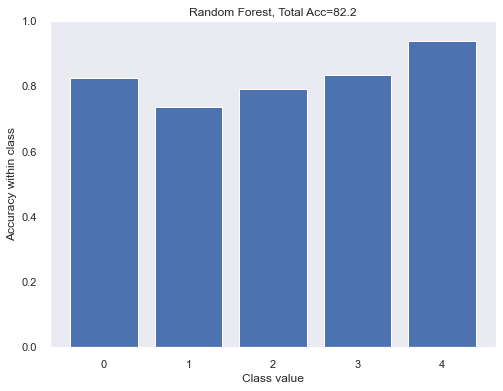

In [255]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="Random Forest")

The overall accuracy of Random Forest Classification is about 82%. The target of the dataset contain 5 different classes. The above accuracy bar plot by each class showed class 4 has highest accuracy, 90% whereas class 1 has the lowest accuracy, 65%. However, the overall accurary of each class has small a standard deviation.    

#### ROC Curve - Random Forest Classifier

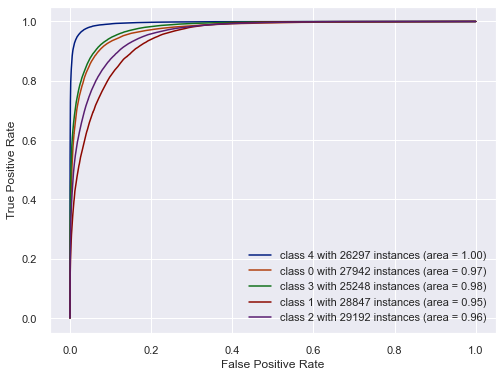

In [256]:
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhat_score = np.zeros((y.shape[0],len(car_df1.price_range.unique())))
for train, test in cv_clf.split(X,y):
    rfc.fit(X[train],y[train])
    yhat_score[test] = rfc.predict_proba(X[test])

# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

for i in np.random.permutation(5)[0:5]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC of Random Forest Classifiction of each class are well above the min threshold,0.5.
Class 4 of the ROC curve approaching closed to max true positive rate of 1 with zero false positive rate which optimal solution. Class 1 is the opposite of class 4 where it is the farthest from the optimal. 
Area under curve(AUC) showed similarity conclusion as ROC curve where class 4 is the best and class 1 is the worst among the 5 classes.

#### The Confusion Matrix - Random Forest

Wall time: 11.5 s


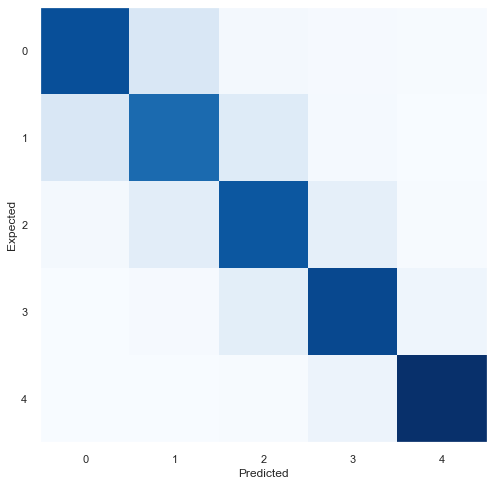

In [257]:
%%time
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(max_depth=50, n_estimators=num_estimators,random_state=42,oob_score=True, n_jobs=20)

rfc.fit(X[train], y[train])
y_pred = rfc.predict(X[test])
# Create a confusion matrix to see what classes StrandSliceClassifier is getting wrong 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.subplots(figsize=(8, 8))
cm = confusion_matrix(y_true=y[test], y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

Using CV with 10 fold for dividing the data set into training and testing splits.
The shaded squares across the matrix diagonal on the confusion matrix showed almost perfect confusion matrix for these 5 classes.

### Model 2: Decision Tree Classifier

In [259]:
%%time
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=100,random_state=42)

yhat_dtc = np.zeros(y.shape)

for train, test in cv_clf.split(X,y):
    dtc.fit(X[train],y[train])
    yhat_dtc[test] = dtc.predict(X[test])

# total_accuracy = mt.accuracy_score(y, yhat_dtc)
# print ('Decision Tree accuracy', total_accuracy)

total_accuracy = mt.accuracy_score(y, yhat_dtc)
total_precision= mt.precision_score(y,yhat_dtc, average='weighted')
total_recall   = mt.recall_score(y,yhat_dtc, average='weighted')
total_f1score  = mt.f1_score(y,yhat_dtc, average='weighted')

print ('Decision Tree accuracy', total_accuracy)
print ('Decision Tree precision', total_precision)
print ('Decision Tree recall', total_recall)
print ('Decision Tree f1 score', total_f1score)

Decision Tree accuracy 0.7785291508514753
Decision Tree precision 0.7787203341825302
Decision Tree recall 0.7785291508514753
Decision Tree f1 score 0.7786065993981123
Wall time: 27.7 s


The accuracy, precision, recall and f1 scores for Decision Tree Classification are lower compared to Random Forest Classification with the same averaged weighted per class on the classification. However, the computed time for decision tree is very fast for such a large data, under 40sec. This will definitely benefit when time is crucial.

#### Accuracy by Class - Decision Tree Classifier

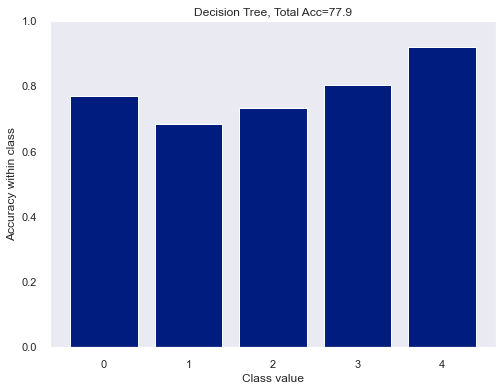

In [260]:
def per_class_accuracy(ytrue,yhat_dtc):
    conf = mt.confusion_matrix(ytrue,yhat_dtc)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat_dtc, title=''):
    acc_list = per_class_accuracy(ytrue,yhat_dtc)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat_dtc)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat_dtc,title="Decision Tree")

The overall accuracy of Decision Tree Classification is about 70%. The target of the dataset contain 5 different classes. 
The above accuracy bar plot by each class showed class 4 has highest accuracy, 90% whereas class 1 has the lowest accuracy, 60%. 
However, the overall accurary of each class has small a standard deviation.

#### ROC Curve - Decision Tree Classifier

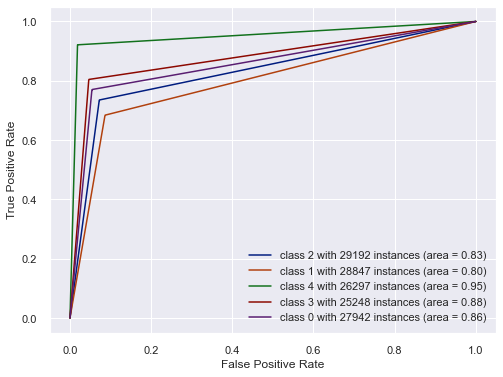

Wall time: 29.2 s


In [261]:
%%time
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhatdtc_score = np.zeros((y.shape[0],len(car_df1.price_range.unique())))

for train, test in cv_clf.split(X,y):
    dtc.fit(X[train],y[train])
    yhatdtc_score[test] = dtc.predict_proba(X[test])
# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhatdtc_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

for i in np.random.permutation(5)[0:5]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC of the Decision Tree of each class are well above the min threshold,0.5. 
Class 4 of the ROC curve approaching closed to max true positive rate of 1 with zero false positive rate which optimal solution. 
Class 1 is the opposite of class 4 where it is the farthest from the optimal. 
Area under curve(AUC) showed similarity conclusion as ROC curve where class 4 is the best and class 1 is the worst among the 5 classes.

#### The Confusion Matrix - Decision Tree

Wall time: 2.71 s


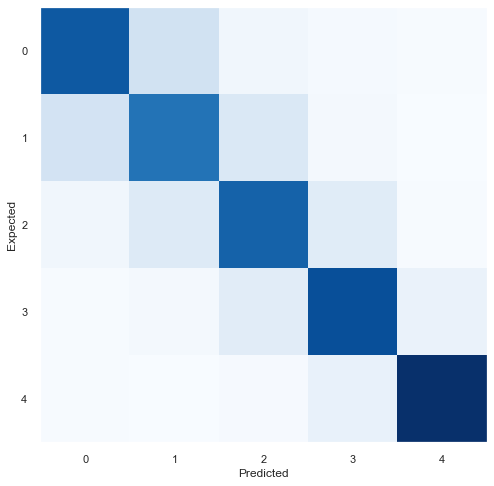

In [262]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Break our data into 80% training and 20% test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Use DecisionTreeClassifier to build a model and predict on the test set

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X[train], y[train])
y_pred = dtc.predict(X[test])
# Create a confusion matrix to see what classes StrandSliceClassifier is getting wrong 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.subplots(figsize=(8, 8))
cm = confusion_matrix(y_true=y[test], y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

Using CV with 10 fold for dividing the data set into training and testing splits.
The shaded squares across the matrix diagonal on the confusion matrix showed almost perfect confusion matrix for these 5 classes.

### Model 3: KNN Classifier

In [263]:
yhatknn = np.zeros(y.shape) # we will fill this with predictions
# create cross validation iterator
cv_clf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# get a handle to the classifier object, which defines the type
clfknn = KNeighborsClassifier(n_neighbors=3,n_jobs=20)
for train, test in cv_clf.split(X,y):
    clfknn.fit(X[train],y[train])
    yhatknn[test] = clfknn.predict(X[test])


total_accuracy = mt.accuracy_score(y, yhatknn)
total_precision= mt.precision_score(y,yhatknn, average='weighted')
total_recall   = mt.recall_score(y,yhatknn, average='weighted')
total_f1score  = mt.f1_score(y,yhatknn, average='weighted')

print ('KNN accuracy', total_accuracy)
print ('KNN precision', total_precision)
print ('KNN recall', total_recall)
print ('KNN f1 score', total_f1score)

KNN accuracy 0.6154908889955354
KNN precision 0.6194809530085299
KNN recall 0.6154908889955354
KNN f1 score 0.6162461425631939


The accuracy, precision, recall and f1 scores for KNN Classification, about 61% are lowest compare to the other 2 Classifications with the same averaged weighted per class on the classification. This KNN classification is not suitable for this data set.

#### Accuracy by Class - KNN

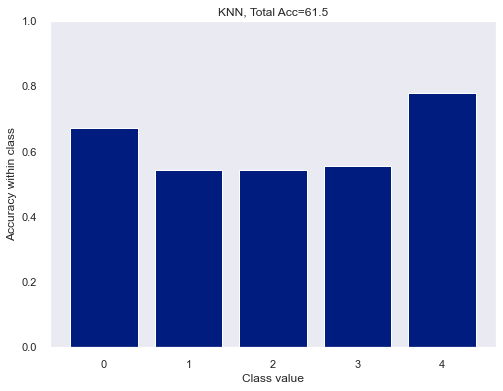

In [264]:
def per_class_accuracy(ytrue,yhatknn):
    conf = mt.confusion_matrix(ytrue,yhatknn)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhatknn, title=''):
    acc_list = per_class_accuracy(ytrue,yhatknn)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhatknn)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhatknn,title="KNN")

The overall accuracy of KNN Classification is about 61%. The target of the dataset contain 5 different classes. The above accuracy bar plot by each class showed class 4 has highest accuracy, 80% whereas class 2 has the lowest accuracy at less than 60%. However, small variance when comparing each class to another.

#### ROC Curve - KNN

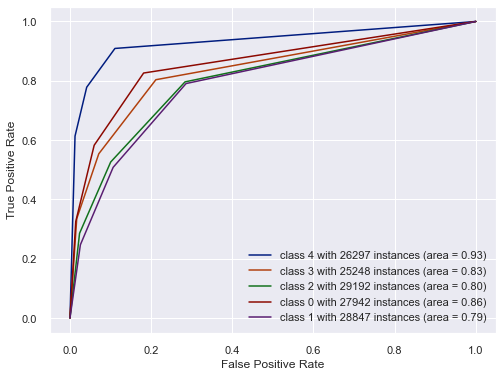

Wall time: 7min 17s


In [265]:
%%time
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

yhatknn_score = np.zeros((y.shape[0],len(car_df1.price_range.unique())))

for train, test in cv_clf.split(X,y):
    clfknn.fit(X[train],y[train])
    yhatknn_score[test] = clfknn.predict_proba(X[test])
# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhatknn_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

for i in np.random.permutation(5)[0:5]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC of KNN of each class are well above the min threshold,0.5. 
Class 4 of the ROC curve approaching closed to the true positive rate of 1 with zero false positive rate which optimal solution. 
Class 2 is the opposite of class 4 where it is the farthest from the optimal. 
Area under curve(AUC) showed similarity conclusion as ROC curve where class 4 is the best and class 2 is the worst among the 5 classes.

#### The Confusion Matrix - KNN

Wall time: 43.8 s


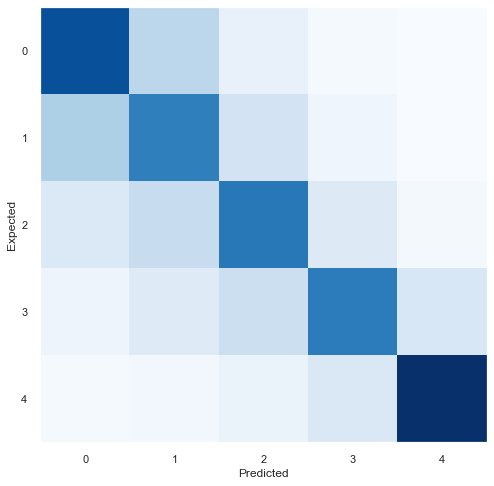

In [266]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Break our data into 80% training and 20% test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Use KNClassifier to build a model and predict on the test set

clfknn = KNeighborsClassifier(n_neighbors=3,n_jobs=20)
clfknn.fit(X[train],y[train])
y_pred = clfknn.predict(X[test])

# Create a confusion matrix to see what classes StrandSliceClassifier is getting wrong 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.subplots(figsize=(8, 8))
cm = confusion_matrix(y_true=y[test], y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

Using CV with 10 fold for dividing the data set into training and testing splits. 
The shaded squares across the matrix diagonal on the confusion matrix showed almost perfect confusion matrix for these 5 classes.

### Regression Task (3 Models)

Before we start interpreting linear regression, we need to recognize that regression can be parametric (linear, ridge, lasso regression) or non-parametric (Random Forests). The parametric model assumes that the response and predictors are linearly related, that the data is homoscedastic and that the observations are independent. If these assumptions are met, then parametric models perform better than non-parametric models. The opposite is also true. Random forest regression models work better than parametric models where the response and predictors are not linearly correlated. A good model should be able to understand the inherent relationships that are present within the predictors and response. While such relationships are easy to visualize by a human if we have a single predictor and response, it becomes incredibly difficult to uncover these relationships once the dimensionality of the data increases. With this background in mind let us analyze the below regression diagnostic plots to understand what is going on. 

In [267]:
#function to evaluate regression models using the cross validation object & custom scorers above
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv_reg, return_train_score=True)
    
    #cross val score sign-flips the outputs of MAE
    #https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1
    
    #print mean MAE for all folds
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg: .5}"
    print(print_str.format(maeAvg=maeAvg))
    

    #print mean RMSE for all folds
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is:  \t\t\t {RMSEavg: .5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('***************************************************************')
    
    print("Cross Validation Fold Mean Error Scores")
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

### Model 1: Linear Regression

**Check Outliers**<br>

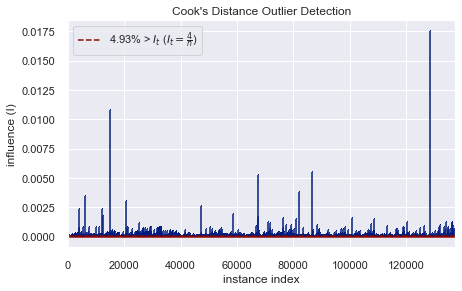

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [268]:
#create an outlier plot
visualizer = RadViz(size=(500,300))

#instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_reg, y_reg)
visualizer.show()

Before we start analyzing the Cook's Distance let us restate the definition of an outlier.  An outlier is an observation that lies outside the normal range of the data drawn from a random sample.  An outlier may be a result of data captured incorrectly, but can also be a correct value created by an anomoly in the random process.  We can also state that an outlier is an observation that does not follow the general trend present in the dataset.  It is easy to visualize outliers using a correlation plot where we have a single predictor and response variable.  However, it is increasingly difficult to visualize outliers when we have multi-dimensional data.  In such cases we can use the Cook's D plot to visualize outliers and check whether those observations have any significant impact on the regression results.  It is also worth mentioning the Cook's D applies only to OLS regression and cannot be applied to non-parametric regression methods.  Just because we have outliers does not mean that those observations will influence results.  Per the plot we can see that only 4.93% of the observations stand out as outliers.  Since these outliers can be valid observations we will keep these in the dataset and proceed with regression.

In [269]:
%%time

#evaluate the regression estimator using our pre-defined cross validation and scoring metrics
EvaluateRegressionEstimator(regEstimator_lr, X_reg, y_reg, cv_reg)

The average MAE for all cv folds is: 			  3864.3
The average RMSE for all cv folds is:  			  9168.3
***************************************************************
Cross Validation Fold Mean Error Scores
Wall time: 17 s


,MAE,RMSE
0,3861.9056,6137.9276
1,3805.5109,5391.9339
2,3893.2313,12615.2087
3,3903.3289,15787.0972
4,3815.9017,5400.7772
5,3824.5561,5443.7664
6,3838.8768,5413.8851
7,3987.8784,24570.2481
8,3853.6471,5445.1905
9,3858.5853,5477.2259


The average RMSE for the Linear Regression model with 10-fold cross validation was 9168.3.  The average MAE was 3864.3.  In looking at each run of the evaluation, the MAE was consistently between 3800 and 3990 whereas the RMSE varied greatly on several of the folds.  The range of values was between 5,391 to almost 25,000. This indicates that some of the splits had predictions with very high errors.

**Residual Plot - Linear Regression**<br>

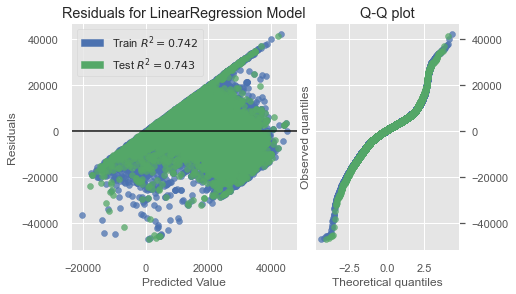

In [329]:
#create residual plot
visualizer = RadViz(size=(500, 300))

# Create the visualizer, fit, score, and show it
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(regEstimator_lr, X_train_reg, y_train_reg, X_test_reg, y_test_reg, qqplot=True, hist=False)

We can see from the plot that the explained variance (R2) is around 60%. Just by looking at this number, we could infer that the model is performing reasonably well, however on analyzing the diagnostic plot we can observe that there are issues with the OLS model. The first issue is that the linear models are predicting prices below zero. We know that used car prices cannot be less than zero. We can see that there are many observations (x<0) where the model underpredicted the price. We can also see that the model is unpredicting the prices from X>0 and X<10000 – Midpoint between 0 and 20000. Therefore, it is safe to conclude that the model does not do a good job in predicting the used car prices for cars with lower values. This could either be a problem with the data or the linear relationships between responses and predictors. Ideally, the residuals of a linear regression diagnostic should be a random cloud uniformly distributed around the 0 residual line and should not show signs of non-constant variance. Looking at the graph, we can say with confidence that the graph does not have constant variance given different prediction values. Although the R2 value is reasonably high we can see that the model does not do a good job predicting values across the board. It is possible that the underlying relationship between the response and predictors is non-linear and therefore the OLS model assumptions are not being met. We will run a random forest model below to check the train of thought. 

**Prediction Error Plot - Linear Regression**<br>

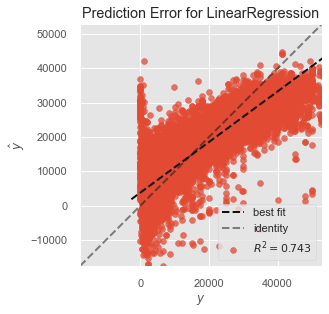

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [330]:
#create error plot
visualizer = RadViz(size=(320,320))
visualizer = PredictionError(regEstimator_lr)

visualizer.fit(X_train_reg, y_train_reg)  # Fit the training data to the visualizer
visualizer.score(X_test_reg, y_test_reg)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

As we saw in the previous diagnostic plot that there were several predictions below zero and there were cases of under and over predicting at specific response levels. Using the predictor plot we can visualize the actual response vs the predicted response. If the predictions are good the best fit line and identity line must lie on top of each other, and the blue observations should be close to the best fit line. We can see that there is quite a bit of deviation between the best fit line and the identity line, indicating the magnitude of error in this model. We shall later compare this plot against the predictor plot for Lasso Regression and from Random Forest Regression to compare the model drifts. 

### Model 2: Lasso Regression

In [272]:
%%time

#evaluate the regression estimator above using our pre-defined cross validation and scoring metrics
EvaluateRegressionEstimator(regEstimator_lasso, X_reg, y_reg, cv_reg)

The average MAE for all cv folds is: 			  3832.5
The average RMSE for all cv folds is:  			  5428.4
***************************************************************
Cross Validation Fold Mean Error Scores
Wall time: 6.79 s


,MAE,RMSE
0,3845.0216,5483.8400
1,3805.3174,5391.9064
2,3824.5429,5398.4284
3,3815.1110,5409.9760
4,3815.6160,5400.4918
5,3824.5948,5443.8413
6,3838.8099,5413.8469
7,3843.7797,5419.1160
8,3853.5867,5445.1863
9,3858.4651,5477.1101


The average RMSE for the Lasso model with 10-fold cross validation was 5428.4.  The average MAE was 3832.5.  While the MAE is very similiar to the Linear Regression model, the RMSE is greatly improved.  In looking at the results of each split, the values are also much more consistent across the splits.  This seems to indicate better results than the baseline Linear Regression model.

**Residual Plot - Lasso Regression**

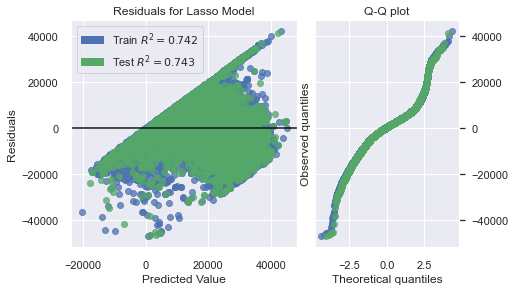

In [273]:
#create residual plots
visualizer = RadViz(size=(500, 300))

# Create the visualizer, fit, score, and show it
viz = residuals_plot(regEstimator_lasso, X_train_reg, y_train_reg, X_test_reg, y_test_reg, qqplot=True, hist=False)

We observe similar issues with the Lasso regression diagnostics as we discussed above. Since lasso regression regularizes the coefficients and assumes the linearity assumptions are met, this model does not do a good job in predicting the response values. 

**Prediction Error Plot - Lasso Regression**<br>

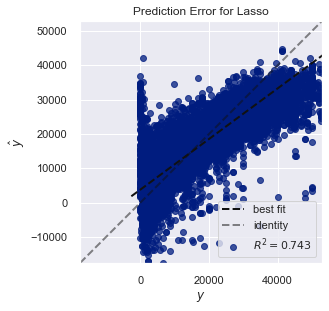

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [274]:
#prediction error plot
visualizer = RadViz(size=(320,320))
visualizer = PredictionError(regEstimator_lasso)

visualizer.fit(X_train_reg, y_train_reg)  # Fit the training data to the visualizer
visualizer.score(X_test_reg, y_test_reg)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

The predictor plot for lasso regression is almost similar to linear regression as both are parametric models and does not do a good job in identifying non linear relationships. Next, we shall move to Random Forest model to see whether there are improvements to the error metric. 

### Model 3: Random Forest Regression

In [275]:
%%time
#evaluate the regression estimatoro above using our pre-defined cross validation and scoring metrics
EvaluateRegressionEstimator(regEstimator_rf, X_reg, y_reg, cv_reg)

The average MAE for all cv folds is: 			  2071.3
The average RMSE for all cv folds is:  			  3477.9
***************************************************************
Cross Validation Fold Mean Error Scores
Wall time: 20min 8s


,MAE,RMSE
0,2048.6235,3454.1552
1,2055.9809,3440.9285
2,2074.8153,3492.5277
3,2055.8214,3410.1807
4,2067.5041,3461.1211
5,2081.9282,3514.4964
6,2070.3948,3436.0664
7,2099.6778,3530.3926
8,2075.9862,3504.9237
9,2082.1081,3534.3981


The average RMSE for the Random Forest model with 10-fold cross validation was 3477.9, which is the lowest RMSE of the three models.  The average MAE was 2071.3.  These are big improvements from the Lasso model.  In terms of dollars, this model's RMSE error is about 2000 less than the Lasso model and almost 5700 lower than Linear Regression.  There is also a low variance in the performance within the individual splits ranging.

**Residual Plot - Random Forest Regression**<br>

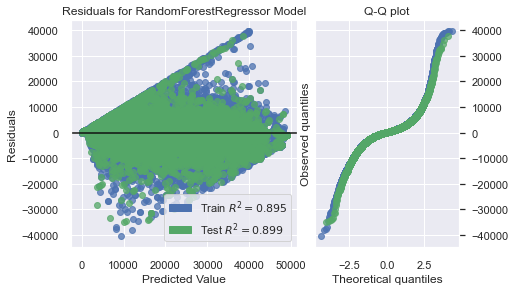

Wall time: 5.59 s


In [303]:
%%time
#create residual plot
visualizer = RadViz(size=(500, 300))

# Create the visualizer, fit, score, and show it
viz = residuals_plot(regEstimator_rf, X_train_reg, y_train_reg, X_test_reg, y_test_reg, qqplot=True, hist=False)

**CHECK FINAL NUMBERS**

The first thing that we observe in the random forest model is that R2 has shot up to 90%. This is a sign that the model is performing better than the linear models (OLS or Lasso). Also, we can see that the model is no longer predicting values less than zero. This makes total sense since it is never possible to sell a car at a negative value. We can see the diagnostic plot and infer that a random cloud is present around the zero-residual line. Therefore, the model does under or over predict car prices. This also shows that the variance is constant at different prediction levels which is a good sign of a predictive model. Therefore, we can say that the random forest is performing better than the linear models. One reason could be that the is no linear relationship present between response and predictor variables. While the parametric models are not equipped to capture non-linear relationships the RF model(non-parametric) can discover nonlinear relationships and perform better when applied to non-linear datasets. 

**Prediction Error Plot - Random Forest Regression**<br>

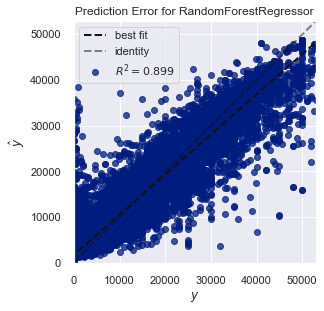

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [304]:
#create error plot
visualizer = RadViz(size=(320,320))
visualizer = PredictionError(regEstimator_rf)

visualizer.fit(X_train_reg, y_train_reg)  # Fit the training data to the visualizer
visualizer.score(X_test_reg, y_test_reg)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

We can see from the prediction error plot that the best fit line and the identify line are much closer to each other than the linear models (OLS & Lasso Regression). This indicates that the RF model is doing a much better job in identifying the nonlinear relationships in the dataset. Also, we can observe that the error is least for responses between 10000 and 30000. The error increases after 40000. This could probably be because of fewer observations around that range. Also, we can see that the error for the zero-response category has reduced. This is because the model is not underpredicting prices at that response variable. The error observations are also much closer to the best fit line indicating that the variance in the model is lower than the above models. 

<a id='model5'></a>
## <font color='darkgreen'> Modeling and Evaluation 5 </font>

<i>Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.</i>

### Classification Task

|<p>Model|<p>Accuracy |<p>Precision|<p>Recall|<p>F1 Score|<p>AUC|<p>Time|
|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|<p>Random Forest Classification |<p>82%|<p>82%|<p>82%|<p>82%|<p>Class 4|10m |
|<p>Decision Trees Classification |<p>78%|78%|<p>78%|<p>78%|<p>Class 4|< 1m|
|<p>KNN Classification |<p>65%|<p>65%|<p>65%|<p>65%|<p>Class 4|7m |

**Random Forest Advantages**<br>
Random Forest Classification has the best metrics:  accuracy, precision, recall and f1 score when compared to the other 2 models for classification:  Decision Tree and KNN for our dataset.  The ROC is also the best ROC.  However, Random Forest has a drawback of cmpute time, having the longest compute time compared to the other 2 classification models.

**Decision Tree Advantages**<br>
Decision Tree Classification has the fastest compute time at less than 1 min for this large data set.  Its metrics are not as good as Random Forest Classification but they are better than KNN classification.  This classification should be the number one choice for a large dataset if the metrics are good as it runs very fast, doesn't require scaling of the data, and is very intuitive and easy to explain.

**KNN Advantages**<br>
KNN Classificaton had the worst performance metrics compared to the other 2 classification models.  It took almost as much time as Random Forest Classification in the compute time.  It does not work well with large datasets nor with high dimension.  However, KNN classification is very easy to implemnt.  

**Is any model better than another?**<br>
Based on Accuracy, Random Forest is the best at 4% higher than the Decision Tree, but the compute time for the Decision Tree is a fraction of RF (~1/15).  Below we will see which model is the best statistically.

**Statistical Significance**

Paired t-tests are used to determine which model is statistically the best.  

In [282]:
#set up
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.tree import DecisionTreeClassifier
num_estimators = 150

clfknn = KNeighborsClassifier(n_neighbors=3,n_jobs=20)
rfc = RandomForestClassifier(max_depth=100, n_jobs=20, n_estimators=num_estimators,random_state=42,oob_score=False)
dtc = DecisionTreeClassifier(random_state=42, max_depth=100, criterion='entropy')

In [283]:
%%time
score1=clfknn.fit(X[train],y[train]).score(X[test],y[test])
score2=rfc.fit(X[train],y[train]).score(X[test],y[test])
score3=dtc.fit(X[train],y[train]).score(X[test],y[test])

Wall time: 52.6 s


In [284]:
%%time
# Comparing Random Forest and KNN Classifiers.
t, p = paired_ttest_5x2cv(estimator1=clfknn,
                          estimator2=rfc,
                          X=X, y=y,
                          random_seed=42)

Wall time: 21min 19s


In [285]:
print('Random Forest and KNN')
print('t statistic: %.3f' % t)
print('p value: %.12f' % p)

Random Forest and KNN
t statistic: -118.254
p value: 0.000000000820


Comparing the performance of Random Forest and KNN, Random Forest has the highest accuracy of about 82%. At α =0.05, we reject the null hypothesis and conclude that the performance of RF and KNN are significantly different (p-value < 0.05).

In [286]:
%%time
# Comparing Random Forest and Decision Tree Classifiers
t1, p1 = paired_ttest_5x2cv(estimator1=dtc,
                          estimator2=rfc,
                          X=X, y=y,
                          random_seed=42)

Wall time: 45.4 s


In [287]:
print('Decision Trees and Random Forest')
print('t statistic: %.3f' % t1)
print('p value: %.12f' % p1)

Decision Trees and Random Forest
t statistic: -31.231
p value: 0.000000631814


Comparing the performance of Random Forest and Decision Trees, Random Forest has the highest accuracy of about 82%. At α =0.05, we reject the null hypothesis and conclude that the performance of Random Forests and Decision Trees are significantly different (p-value < 0.05).  

In [288]:
%%time
# Comparing KNN and Decision Tree Classifiers.
t2, p2 = paired_ttest_5x2cv(estimator1=clfknn,
                          estimator2=dtc,
                          X=X, y=y,
                          random_seed=42)

Wall time: 20min 57s


In [289]:
print('Decision Trees and KNN')
print('t statistic: %.3f' % t2)
print('p value: %.12f' % p2)

Decision Trees and KNN
t statistic: -75.241
p value: 0.000000007856


Comparing the performance of Decision Trees and KNN, Decision Trees has the highest accuracy of about 70%. At α =0.05, we reject the null hypothesis and conclude that the performance of Decision Trees and KNN are significantly different (p-value < 0.05).  

We conclude that Random Forest Classification is the best model because it has the highest accuracy and is statistically different than KNN and Decision Trees.

### Regression Task

|<p>Model|<p>RMSE |<p>MAE|<p>R2|<p>Time|
|:-----|:-----|:-----|:-----|:-----|
|<p>Linear Regression |<p>9168.8|<p>3864.3|<p>74.3|< 1m |
|<p>Lasso Regression |<p>5428.4|3832.5|<p>74.3|< 1m|
|<p>Random Forest Regression |<p>3477.9|<p>2071.3|<p>85.2|20m |
    

**Linear Regression Advantages**<br>
The primary advantages of Linear Regression are the interpretability and simplicity of a linear relationship.  Another benefit is that it runs quickly.  With over 137,000 observations and 121 features, a 10-fold cross validation ran in less than 2 minutes.  However, to be useful the model assumptions of linearity, constant variance, and independence need to be met.  As we saw above in the residuals, the linear regression model does not work well with this dataset.  

**Lasso Regression Advantages**<br>
Lasso is a feature selection technique for OLS regression.  It uses a penalized least squares approach that squeezes the regression coefficients to zero when the penalty is large. The algorithm starts with a large penalty and gradually relaxes the penalty to allow for a single variable to be added into the model (the coefficient is no longer 0).  Squeezing the coefficients to zero can reduce variance without increasing bias.  It also increases model interpretability by removing irrelevant variables that are not associated with the response variables.  This is particularly important for high dimensional data.  By removing irrelevant features we also decrease overfitting in the model.  The Lasso model was a significant improvement from the basic regression model and had great performance.  It did not perform quite as well as Random Forest with regard to RMSE, but it had better performance.    

**Random Forest Advantages**<br>
We must use non-parametric models if the relationships between features and responses is non linear.  As shown here, the Random Forest model performed better than the linear models.  A point to mention here is that Random Forest can handle missing data.  Although we have cleaned our data to remove/adjust for missing values, Random Forest can adjust for missing values by using the variable appearing most a node.   The main down side to the model is performance time.  It takes longer than the other models, especially when it comes to performance tuning with a GridSearch.

**Is any model better than another?**<br>
As discussed before, the Random Forest model is better than the linear or lasso regression models.  We can prove this using multiple approaches outlined above.  First, we observed that using the residual diagnostic plots that linear and lasso regression were underpredicting/overpredicting responses.  Also, the linear models were predicting responses less than zero, which is incorrect.  On the other hand, we could see that the residual diagnostic plots for the Random Forest were distributed (with the exceptions of outliers) and did not have negative responses or under/over predicting responses.  Second, we could observe the significant improvement of the R2 value in the Random Forest model.  This means that Random Forest was better able to explain variance than the linear models.  A better way to model error is 10-fold cross validation.  We can see that the RMSE metric using 10-fold cross validation is largest for the OLS model and smallest for the Random Forest model.  Again, we see that RF does a much better job in predicting responses.  Therefore, this proves that there is a non-linear relationship present in the dataset and linear models were unable to establish those relationships.  Further statistical analysis is performed below.

**Statistical Significance**

In [292]:
regEstimator_lr = LinearRegression(normalize=True, n_jobs=20)
regEstimator_lasso = Lasso(alpha=0.001, max_iter=10000, normalize=True, precompute=True, random_state=42, warm_start=True)
regEstimator_rf = RandomForestRegressor(criterion='mse', min_samples_leaf=10, oob_score=True, random_state=42, n_jobs=20)

In [293]:
score1=regEstimator_lr.fit(X_train_reg,y_train_reg).score(X_test_reg,y_test_reg)
score2=regEstimator_lasso.fit(X_train_reg,y_train_reg).score(X_test_reg,y_test_reg)

In [294]:
%%time
score3=regEstimator_rf.fit(X_train_reg,y_train_reg).score(X_test_reg,y_test_reg)

Wall time: 15.3 s


In [323]:
print('Linear Regression Score: %.2f%%' % (score1))
print('Lasso Regression Score: %.2f%%' % (score2))
print('RF Regression Score: %.2f%%' % (score3))

Linear Regression Score: 0.68%
Lasso Regression Score: 0.74%
RF Regression Score: 0.90%


In [324]:
%%time
#run the paired t-test for LR and Lasso
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=regEstimator_lr,
                          estimator2=regEstimator_lasso,
                          X=X_reg, y=y_reg,
                          random_seed=42)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.000
p value: 1.000
Wall time: 10.2 s


The above paired t-test compares the R2 score of Linear Regression (68%) and Lasso (74%). At α = 0.05, we fail to reject the null hypothesis and conclude that the performance of LR and Lasso are not significantly different (p-value > 0.05).

In [302]:
%%time
#run the paired t-test for Lasso and RF
t, p = paired_ttest_5x2cv(estimator1=regEstimator_lasso,
                          estimator2=regEstimator_rf,
                          X=X_reg, y=y_reg,
                          random_seed=42)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -181.878
p value: 0.000
Wall time: 1min 19s


The above paired t-test compares the R2 score of Lasso (74%) with Random Forest (90%), At α =0.05, we reject the null hypothesis and conclude that there is a statistically significant difference between Lasso and Random Forest (p-value < 0.05). 

In [325]:
%%time
#run the paired t-test for LR and RF
t, p = paired_ttest_5x2cv(estimator1=regEstimator_lr,
                          estimator2=regEstimator_rf,
                          X=X_reg, y=y_reg,
                          random_seed=42)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.000
p value: 1.000
Wall time: 1min 24s


The above paired t-test compares the R2 score of Linear Regression (68%) and Random Forest (90%). At α = 0.05, we fail to reject the null hypothesis and conclude that the performance of LR and Random Forest are not significantly different (p-value > 0.05).  This conclusion does not make sense considering that there is a statistically significant difference between RF and Lasso even though Lasso has a higher R2 score than LR.  The authors will continue to investigate this to determine why these unexpected results are occuring.

Based on the statistical analysis, RF is significantly different than Lasso.  The other tests did not detect a significant difference.

<a id='model6'></a>
## <font color='darkgreen'> Modeling and Evaluation 6 </font>

<i>Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.</i>

Random Forest Feature Importance is used for both Classification and Regression to analyze the most important attributes.

### Classification Task

In [318]:
weights = rfc.feature_importances_
#weights.shape
feature_names = car_df1_ohe_class.columns
#len(feature_names)
rfc_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
rfc_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

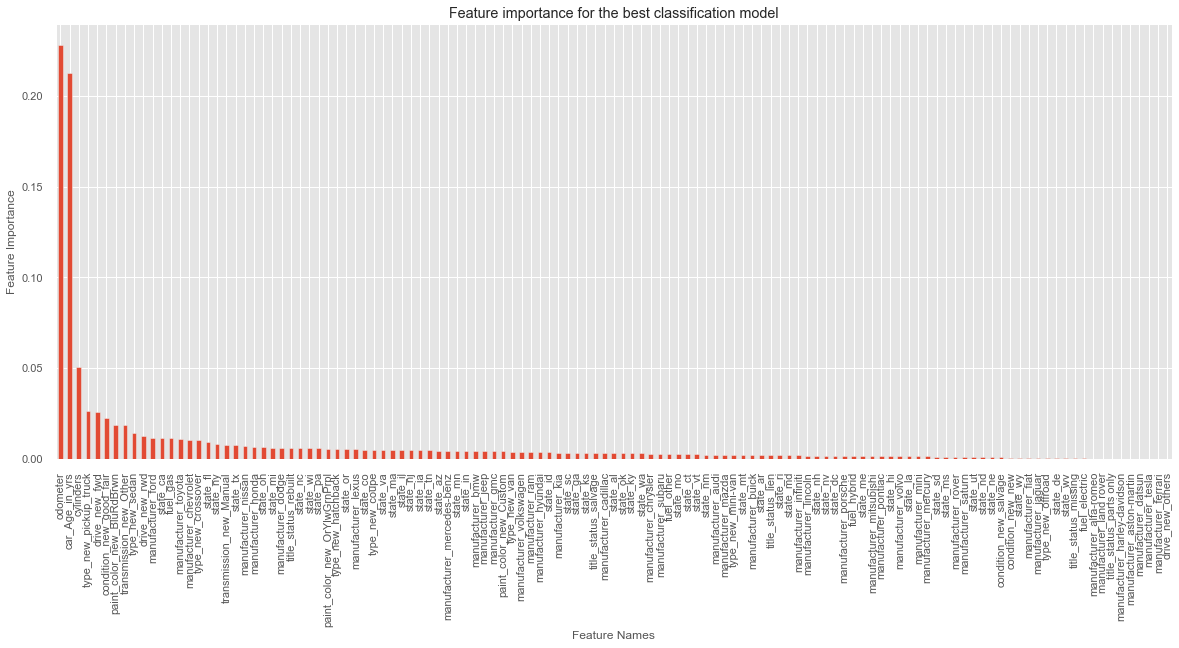

In [319]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')
wt_plt_df = rfc_ft_imp_df
weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))
ax.set_title("Feature importance for the best classification model")
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Feature Names")
plt.show()

### Regression Task

In [320]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = regEstimator_rf.feature_importances_.ravel()
feature_names = car_df1_ohe_reg.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

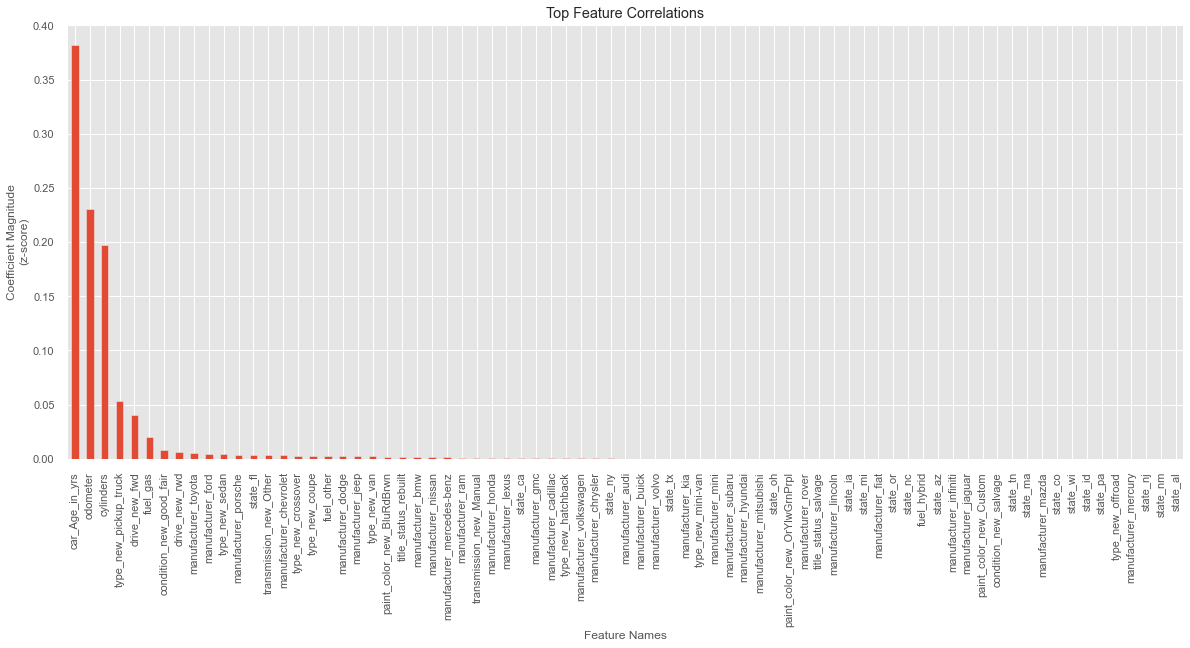

In [321]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

**Most Important Attributes**<br>
The most important attributes for both Classification and Regression are odometer, car_Age_in_yrs, and cylinders.

**Why are some more important than others?**<br>
The most important variables are based in the impurity score from Random Forest as shown in the Random Forest feature importance plots above.  <p>
    
For Classification we can see that the age of the car in years has the most importance in determining the price of the car. This observation makes sense as we know that the value of a car depreciates with increasing age. The next most importance feature is odometer. Again, common knowledge tells us that the value of a car depreciates with increased mileage as it is a common indicator of wear and tear on a car. In other words, we can also say that there is correlation between age of cars and odometer as cars with higher age tend to have higher odometer readings. Typically, higher number of cylinders is associated with premium / sports cars, which are not sold at such lower values in used car markets. Normally trucks have six or higher cylinders and therefore it makes sense to see that trucks are also negatively correlated with the price segment. <p>
    
For Regression the most important feature is Odometer.  What this means is that these cars are new and have fewer miles on them, thereby commanding higher prices in the used car market.  The next most important features are car age and cylinders with the same reasons provided for classification above.

<a id='deployment'></a>
## <font color='darkgreen'> Deployment </font>

<i>	How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? </i>

<i>	How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?</i>

This model could be a useful research tool for individuals buying or selling a vehicle on Craig's list.  If a seller is uncertain of how much to sell a car for, this tool could be used to get a predicted price or price range before setting the sale price.  Or if a seller is having trouble getting responses to a listing, this tool could help determine if the price is too high.  A buyer who is interested in a particular car may want to find out if the asking price is a good one compared to other listings.  This could save a buyer time by avoiding clicking through many car listings to manually compare car features and prices.  

Because the data used to train the model is from Craig's list, the model only makes sense for that site in its current form, but it could be re-trained and deployed to other used car sites with the appropriate data.

<i>How would you measure the model's value if it was used by these parties?</i>

To measure the model's value we would track how much it is used and what the next actions are from the buyer or seller.  Did the seller use the predicted price/price range to set the sale price?  Are buyers more likely to reply to ads after using the tool?  These actions would be tracked and analyzed to determine the value of the model. 

<i>How would you deploy your model for interested parties? </i>

**Sellers:**  The relevant features of the car would be gathered from a web form and passed to a trained model.  The model would make a prediction and return it to the seller.  The seller could choose to use the prediction or set a different price.    

**Buyers:**  The application would gather the car's features, pass them to the model, and return an estimated price or price range for the car.  Craig's list could also display an icon or symbol indicating whether a car is a good price, similar to the "Good Deal" tag on cars.com where a vehicle's price and features are compared to similiar cars (see example below).  The "Good Deal" tag would require an additional calculation to compare the prediction to an actual listing price.  To take it one step further, it would be useful to present information to the buyer about which features are driving the cost of a car to be higher or lower than other similiar cars.  For example, a car without a title might explain why its price is lower than other cars with similiar features.

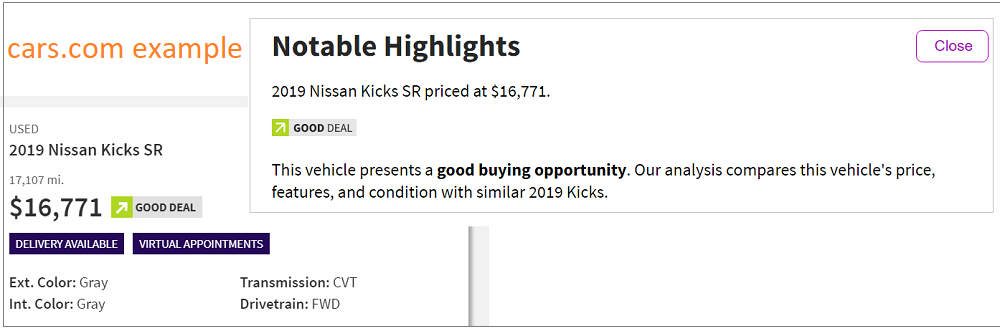

In [1]:
from IPython.display import Image
Image(filename='carsdotcom.png', width = 700, height = 400)

<i>What other data should be collected?</i> 

Additional sources like Kelly Blue Book data could be presented along with these predictions as another point of comparison when buyers or sellers are trying to gain insights into used car prices.  

<i>How often would the model need to be updated, etc.? </i>

Ideally, this model would be re-trained with new listings once per week and would include the most recent four weeks of data in order to stay relevant with current market conditions.  However, with data that recent predictions could be requested for cars that have been used to train the model.  To avoid this, all postings would be saved, but only inactive or retired listings would be used to train the model.  This may require using data a month or two in the past.  

For any of these tools, there should be a disclaimer that the predicted prices are based on past Craig's list vehicle listings and may not reflect the quality or the true value of the car.  

<a id='exceptional'></a>
## <font color='darkgreen'> Exceptional Work </font>

<i>	You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm? </i>

GridSearches were performed for all six models.  The top five results for each GridSearch are show below along with a plot of the cv_results_ for each GridSearch.

### Classification Task

### Model 1: Random Forest Classification

In [305]:
tune_df_rfc.head(5)

,Rank,max_depth,max_features,n_estimators,Mean Test Score(Accuracy)
0,1,50,auto,150,0.8228
1,1,50,sqrt,150,0.8228
2,3,125,sqrt,150,0.8224
3,3,125,auto,150,0.8224
4,3,100,auto,150,0.8224


<AxesSubplot:xlabel='n_estimators', ylabel='Mean Test Score(Accuracy)'>

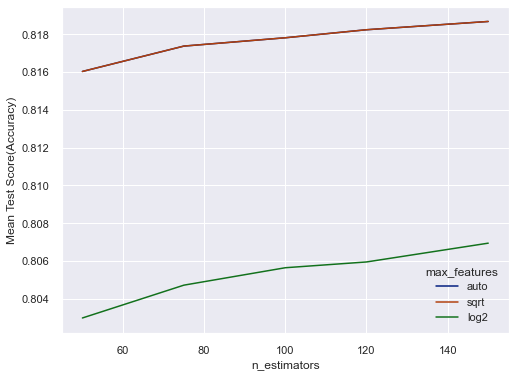

In [306]:
sns.lineplot(data=tune_df_rfc, x="n_estimators", y="Mean Test Score(Accuracy)", hue="max_features", ci=None)

The accuracy for the Random Forest Classifier increases as n_estimators increases with the highest accuracy at 150. From the orange line at the top of the plot, we can see that the sqrt parameter produces better results than the log2 max_features.

<AxesSubplot:xlabel='max_depth', ylabel='Mean Test Score(Accuracy)'>

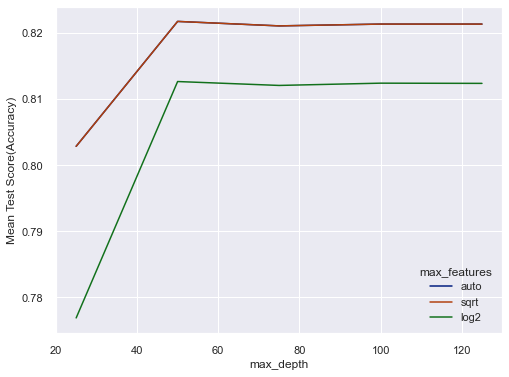

In [307]:
sns.lineplot(data=tune_df_rfc, x="max_depth", y="Mean Test Score(Accuracy)", ci=None, hue="max_features")

The accuracy for Random Forest Classifier is slightly better when the max depth of the tree is set to 50 than with the higher max_depth values.  Again, we can see that the sqrt max_features has a higher accuracy than log2.

### Model 2: Decision Tree Classification

In [308]:
tune_df_dt.head(5)

,Rank,criterion,max_depth,Mean Test Score(Accuracy)
0,1,entropy,100,0.7785
1,2,entropy,50,0.7785
2,3,gini,100,0.7760
3,4,gini,50,0.7756
4,5,gini,20,0.7650


<AxesSubplot:xlabel='max_depth', ylabel='Mean Test Score(Accuracy)'>

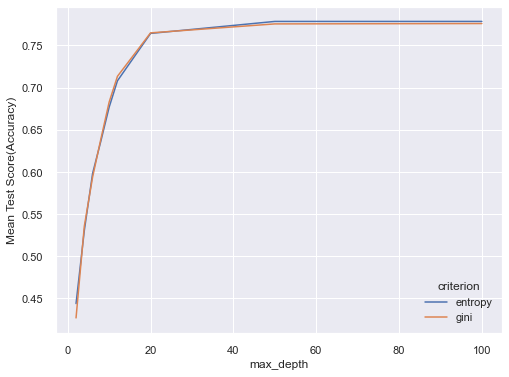

In [309]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.lineplot(data=tune_df_dt, x="max_depth", y="Mean Test Score(Accuracy)", hue="criterion", ci=None)

The accuracy for the Decision Tree is slightly better when the criterion, which is the function to measure the quality of a split, is set to "entropy." The max depth of tree equal to 50 and 100 produce the same results when the criterion is entropy. When the criterion is gini, a max depth of 100 produces a slightly higher accuracy than a max_depth of 50 or 20.  

### Model 3: KNN Classifier

In [310]:
tune_df_knn.head(5)

,Rank,n_neighbors,weights,Mean Test Score(Accuracy)
0,1,7,distance,0.6465
1,2,3,distance,0.6464
2,3,5,distance,0.6463
3,4,9,distance,0.6460
4,5,1,uniform,0.6453


<AxesSubplot:xlabel='n_neighbors', ylabel='Mean Test Score(Accuracy)'>

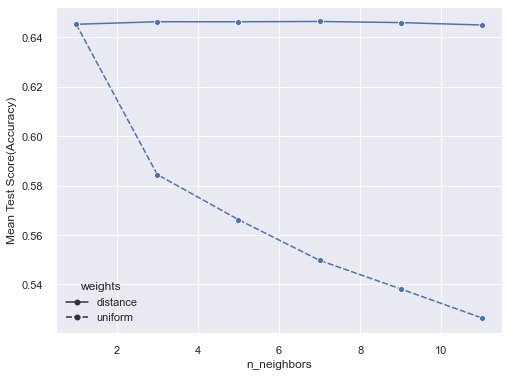

In [311]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.lineplot(data=tune_df_knn, x="n_neighbors", y="Mean Test Score(Accuracy)", ci=None, markers=["o","o"], style="weights")

The GridSearch results show that 7 neighbors produce the model with the highest accuracy.  The uniform setting for the weight parameter is highest when n_neighbors is 1 and goes down as n_numbers increases, while the accuracy is consistently above 64% when the weight parameter set to distance. 

### Regression Task

### Model 1: Linear Regression

In [312]:
tune_df_lr.head(5)

,Rank,fit_intercept,normalize,Mean Test Score (RMSE)
0,1,True,True,9131.5905
1,2,True,False,9229.3419
2,3,False,True,4818686.2551
3,3,False,False,4818686.2551


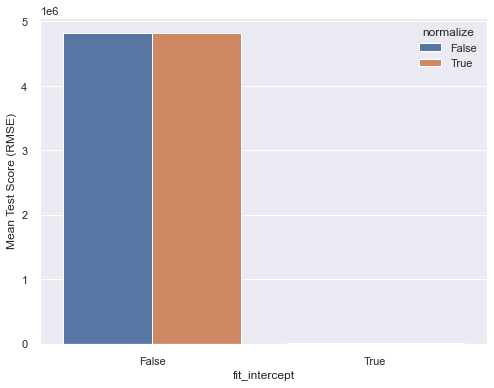

In [313]:
sns.set(rc={'figure.figsize':(8, 6)})
ax = sns.barplot(x="fit_intercept", y="Mean Test Score (RMSE)", hue="normalize", data=tune_df_lr)

The scores for the Linear Regression model significantly improved when the fit_intercept parameter was set to True, which makes sense for this dataset since it is not centered.  A normalize value of True yields a better score than a False value when the fit_intercept is True.  When fit_intercept is set to False, the normalize parameter is ignored.  This is why there is no difference between the results when fit_intercept is False.

### Model 2: Lasso Regression

In [314]:
tune_df_lasso.head(5)

,Rank,alpha,fit_intercept,selection,tol,warm_start,Mean Test Score (RMSE)
0,1,0.0010,True,cyclic,0.0001,True,5428.3743
1,1,0.0010,True,cyclic,0.0001,False,5428.3743
2,3,0.0010,True,random,0.0001,True,5428.3745
3,3,0.0010,True,random,0.0001,False,5428.3745
4,5,0.0010,True,cyclic,0.0010,True,5428.3757


<AxesSubplot:xlabel='alpha', ylabel='Mean Test Score (RMSE)'>

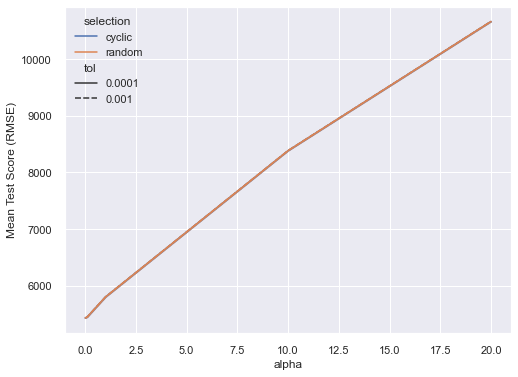

In [315]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.lineplot(data=tune_df_lasso, x="alpha", y="Mean Test Score (RMSE)", hue="selection", style='tol')

An alpha value of 0.0010 produced the best result (lowest RMSE) of all the alpha values.  The selection parameter set to 'cyclic' only performed slightly better than a 'random' setting.  A tol value of 0.0001 was slightly better than 0.0010 but it is so minor that it's not detectable in this plot.  The warm_start parameter did not have an effect in the RMSE of the top five models.

### Model 3: Random Forest Regression

In [316]:
tune_df_rf.head(5)

,Rank,criterion,min_samples_leaf,min_samples_split,n_estimators,oob_score,random_state,Mean Test Score (RMSE)
0,1,mse,10,2,100,True,42,4116.4825
1,1,mse,10,5,100,True,42,4116.4825
2,1,mse,10,10,100,True,42,4116.4825
3,4,mae,10,2,100,True,42,4183.3763
4,4,mae,10,5,100,True,42,4183.3763


<AxesSubplot:xlabel='min_samples_leaf', ylabel='Mean Test Score (RMSE)'>

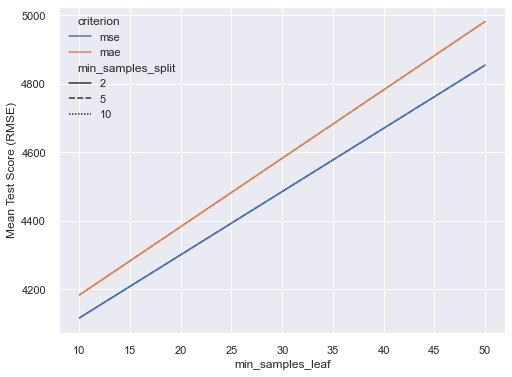

In [317]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.lineplot(data=tune_df_rf, x="min_samples_leaf", y="Mean Test Score (RMSE)", hue="criterion", ci=None, style="min_samples_split")

A min_samples_leaf value of 10 had the best RMSE score.  The error score increases as the min_samples_leaf value increases with the highest error at 50 min_samples_leaf.  For min_samples_split, the values tested for 2, 5, and 10 did not change the scores.  The criterion parameter of mse improved the score over the mae default mae criterion.

To conclude, these were the best parameters from hypertuning with GridSearch.

|<p>Model|<p>Param 1 |<p>Param 2|<p>Param 3|
|:-----|:-----|:-----|:-----|
|<p>Random Forest Classifier |<p>max_depth=50|<p>max_features=auto or sqrt|<p>max_estimates=150|
|<p>Decision Tree Classifier |<p>criterion=entropy|<p>max_depth=100 or 50|<p>N/A|
|<p>KNN Classifier |<p>n_neighboers=7|<p>weights=distance|<p>N/A|
|<p>Linear Regression |<p>fit_intercept=True|<p>normalize=True|<p>N/A|
|<p>Lasso Regression |<p>alpha=0.0010|selction=cyclic|<p>tol=0.0001|
|<p>Random Forest Regression |<p>criterion=mse|<p>min_samples_leaf=10|<p>min_samples_split= 2, 5, or 10|